In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
ATLAS = "AAL+CSF"
workdir = "../braintypicality/workdir/cuda_opt/learnable"

In [2]:
""" The AAL (Automated Anatomical Labeling) atlas is a commonly used brain atlas in MRI studies, 
dividing the brain into standardized anatomical regions, which helps with consistent mapping and analysis. 
CSF (Cerebrospinal Fluid) represents the fluid surrounding the brain, often included in analyses to separate neural signals 
from fluid signals. Together, “AAL+CSF” indicates that both brain regions and CSF areas are included """

' The AAL (Automated Anatomical Labeling) atlas is a commonly used brain atlas in MRI studies, \ndividing the brain into standardized anatomical regions, which helps with consistent mapping and analysis. \nCSF (Cerebrospinal Fluid) represents the fluid surrounding the brain, often included in analyses to separate neural signals \nfrom fluid signals. Together, “AAL+CSF” indicates that both brain regions and CSF areas are included '

## Loading Voxel-wise Scores

In [3]:
PATH_atlas_mapping = 'roi_behavior_correlations/'
with open(f'{PATH_atlas_mapping}aal-atlas-name-mapping.json', 'r') as file:
    short_to_desc = json.load(file)
short_to_desc['background'] = "Background"
short_to_desc['Frontal_Sup_Orb_L'] = 'Left Superior frontal gyrus, orbital part'
short_to_desc['Frontal_Sup_Orb_R'] = 'Right Superior frontal gyrus, orbital part'
short_to_desc['Parietal_Inf_L']    = 'Left Inferior parietal'
short_to_desc['Parietal_Inf_R']    = 'Right Inferior parietal'

In [4]:
region_scores_raw = pd.read_csv(f"{workdir}/eval/heatmaps_v2/roi/{ATLAS}_roi_likelihoods_abcd_ibis_conte.csv").rename(columns=short_to_desc) # not used here
region_scores_harmonized = pd.read_csv(f"{workdir}/eval/heatmaps_v2/roi/{ATLAS}_roi_harmonized_likelihoods_abcd_ibis_conte.csv").rename(columns=short_to_desc)

In [5]:
roi_columns = region_scores_harmonized.columns.difference(['Cohort', "ID"])

In [6]:
roi_columns

Index(['Background', 'CSF', 'Left Amygdala', 'Left Angular gyrus',
       'Left Anterior cingulate and paracingulate gyri',
       'Left Calcarine fissure and surrounding cortex', 'Left Caudate',
       'Left Crus I of cerebellar hemisphere',
       'Left Crus II of cerebellar hemisphere', 'Left Cuneus',
       ...
       'Right Superior frontal gyrus, medial orbital',
       'Right Superior frontal gyrus, orbital part',
       'Right Superior occipital gyrus', 'Right Superior parietal gyrus',
       'Right Superior temporal gyrus', 'Right Supplementary motor area',
       'Right Supramarginal gyrus',
       'Right Temporal pole: middle temporal gyrus',
       'Right Temporal pole: superior temporal gyrus', 'Right Thalamus'],
      dtype='object', length=118)

### Full names are adopted from various sources:

#### CBCL
- https://www.parinc.com/docs/default-source/product-resources/sample_c15.pdf
- http://crisisresponse.promoteprevent.org/webfm_send/2475

#### DAS
- https://www.myschoolpsychology.com/wp-content/uploads/2014/02/Differential-Ability-Scales.pdf

#### Vineland-II
- https://www.ualberta.ca/en/community-university-partnership/media-library/community-university-partnership/resources/tools---assessment/vinelandjune-2012.pdf

## Manually select regions and behaviors. (related to ASD)

In [7]:
# Relevant columns to keep
columns_to_keep = [
    'ID',
    "Cohort",
    # 'Sex',

    # Brain regions related to ASD
    "Left Precentral gyrus", "Right Precentral gyrus",
    "Left Superior frontal gyrus, dorsolateral", "Right Superior frontal gyrus, dorsolateral",
    "Left Middle frontal gyrus", "Right Middle frontal gyrus",
    "Left Inferior frontal gyrus, triangular part", "Right Inferior frontal gyrus, triangular part",
    "Left Insula", "Right Insula",
    "Left Anterior cingulate and paracingulate gyri", "Right Anterior cingulate and paracingulate gyri",
    "Left Posterior cingulate gyrus", "Right Posterior cingulate gyrus",
    "Left Fusiform gyrus", "Right Fusiform gyrus",
    "Left Superior temporal gyrus", "Right Superior temporal gyrus",
    "Left Superior parietal gyrus", "Right Superior parietal gyrus",
    "Left Precuneus", "Right Precuneus",
    "Left Cuneus", "Right Cuneus",
    "Left Thalamus", "Right Thalamus",
    "Left Amygdala", "Right Amygdala",
    "Left Crus I of cerebellar hemisphere", "Right Crus I of cerebellar hemisphere",
    "Left Crus II of cerebellar hemisphere", "Right Crus II of cerebellar hemisphere",
    "Left Lobule VI of cerebellar hemisphere", "Right Lobule VI of cerebellar hemisphere",

    # Behavior assessment scores
    # "Vineland-daily_living_skills_STD_SCORE",
    # "Vineland-socialization_STD_SCORE",
    # "CBCL-social_prob_T_score", "CBCL-social_prob_percentile", "CBCL-social_prob_score",
    # "CBCL-thought_prob_T_score", "CBCL-thought_prob_percentile", "CBCL-thought_prob_score",
    # "CBCL-anx_prob_T_score", "CBCL-anx_prob_percentile", "CBCL-anx_prob_score",
    # "CBCL-internalizing_T_score", "CBCL-internalizing_percentile", "CBCL-internalizing_score",
    # "CBCL-externalizing_T_score", "CBCL-externalizing_percentile", "CBCL-externalizing_score",
    # "CBCL-total_problems_T_score", "CBCL-total_problems_percentile", "CBCL-total_problems_score",
    # "CBCL-attention_prob_T_score", "CBCL-attention_prob_percentile", "CBCL-attention_prob_score",
    # "V24 ADOS_Derived,restricted_repetitive_behavior_total",
    # "V36 ADOS_Derived,restricted_repetitive_behavior_total",
    # "V24 ADOS_Derived,social_affect_total", "V36 ADOS_Derived,social_affect_total"
]


region_scores_harmonized_reduced = region_scores_harmonized[columns_to_keep]

In [8]:
# Use the selected regions
region_scores_harmonized = region_scores_harmonized_reduced

In [9]:
key_list = [
    'IBIS160209','IBIS389521','IBIS107524','IBIS903923','IBIS152174','IBIS396346','IBIS460612','IBIS515353','IBIS680028','IBIS830319','IBIS569748',
    'IBIS108131','IBIS373485','IBIS845807','IBIS910593','IBIS919979','IBIS155712','IBIS929204','IBIS973338','IBIS174982','IBIS983222','IBIS230955',
    'IBIS988197','IBIS235108','IBIS988903','IBIS241033','IBIS291809','IBIS336576','IBIS389101','IBIS391729','IBIS402809','IBIS439857','IBIS447754',
    'IBIS456823','IBIS463809','IBIS482642','IBIS490878','IBIS544847','IBIS552855','IBIS553295','IBIS597653','IBIS603076','IBIS628043','IBIS638999',
    'IBIS641078','IBIS649998','IBIS784198','IBIS809318','IBIS816236','IBIS841812','IBIS930203','IBIS931343','IBIS943489','IBIS950194','IBIS963992',
            ]

In [10]:
ibis_proto_table_inliers = pd.read_csv("ghsom_outputs/bmus/parent_map_table_ibis_4x4_inliers.csv")
ibis_proto_table_outliers = pd.read_csv("ghsom_outputs/bmus/parent_map_table_ibis_4x4_outliers.csv")

In [11]:
abcd_proto_table_inliers = pd.read_csv("ghsom_outputs/bmus/parent_map_table_abcd_5x3_inliers.csv")
abcd_proto_table_outliers = pd.read_csv("ghsom_outputs/bmus/parent_map_table_abcd_5x3_outliers.csv")

In [12]:
ibis_proto_table_inliers

,Input Index,Mapped Position,Identifier,Input Label,Label Name,BMU Distance
0,17,"(0, 0)",HCD0960155,-1,ABCD,1.997943
1,53,"(0, 0)",HCD2236140,-1,ABCD,1.328776
2,69,"(0, 0)",HCD2879788,-1,ABCD,1.310673
3,88,"(0, 0)",NDARINVET503WH4,-1,ABCD,1.170611
4,104,"(0, 0)",NDARINV4TG8X5LW,-1,ABCD,1.930820
...,...,...,...,...,...,...
407,332,"(1, 3)",IBIS660345,0,LR-Typical,2.333337
408,346,"(1, 3)",IBIS799490,0,LR-Typical,1.902109
409,366,"(1, 3)",IBIS895607,0,LR-Typical,2.202993
410,390,"(1, 3)",IBIS490324,0,LR-Typical,2.407988


In [13]:
proto_ibis_inliers = ibis_proto_table_inliers[ibis_proto_table_inliers["Label Name"] == "LR-Typical"]

In [14]:
ibis_proto_table_outliers

,Input Index,Mapped Position,Identifier,Input Label,Label Name,BMU Distance
0,41,"(0, 3)",IBIS247315,1,HR-Typical,2.710514
1,81,"(0, 3)",IBIS476634,1,HR-Typical,1.526264
2,97,"(0, 3)",IBIS525057,1,HR-Typical,2.804807
3,112,"(0, 3)",IBIS214027,2,Atypical,1.043259
4,134,"(0, 3)",IBIS796006,2,Atypical,2.148146
...,...,...,...,...,...,...
232,170,"(1, 3)",IBIS976405,3,Down Syndrome,1.932469
233,174,"(1, 3)",IBIS903923,4,ASD,2.242037
234,196,"(1, 3)",IBIS389521,4,ASD,1.719558
235,208,"(1, 3)",IBIS515353,4,ASD,1.794249


In [15]:
proto_ibis_outliers = ibis_proto_table_outliers[
    (ibis_proto_table_outliers["Label Name"] == "ASD") &
    (ibis_proto_table_outliers["Identifier"].isin(key_list))
]

In [16]:
abcd_proto_table_inliers

,Input Index,Mapped Position,Identifier,Input Label,Label Name,BMU Distance
0,5,"(0, 0)",HCD0536142,-1,ABCD,1.156426
1,9,"(0, 0)",HCD0583555,-1,ABCD,1.791528
2,22,"(0, 0)",NDARINV6HAPRB0L,-1,ABCD,1.353710
3,36,"(0, 0)",NDARINV8MD5H3AW,-1,ABCD,1.238944
4,38,"(0, 0)",NDARINV8N41W2W1,-1,ABCD,1.807603
...,...,...,...,...,...,...
407,386,"(2, 2)",IBIS449310,0,LR-Typical,1.140783
408,388,"(2, 2)",IBIS478890,0,LR-Typical,1.364846
409,403,"(2, 2)",IBIS622437,0,LR-Typical,0.588681
410,407,"(2, 2)",IBIS728124,0,LR-Typical,1.141811


In [17]:
proto_abcd_inliers = abcd_proto_table_inliers[abcd_proto_table_inliers["Label Name"] == "ABCD"]

In [18]:
proto_abcd_outliers = abcd_proto_table_outliers[
    (abcd_proto_table_outliers["Label Name"] == "ABCD-ASD") &
    (abcd_proto_table_outliers["Identifier"] != "NDARINVCCBRA37Z")
]

In [19]:
from collections import defaultdict
import pandas as pd

# 1) Helper to parse a raw "Mapped Position" key into an (i, j) tuple
def parse_position(pos):
    if isinstance(pos, tuple) and len(pos) == 2:
        return pos
    s = str(pos).strip()
    if ',' in s:
        parts = [p.strip() for p in s.strip('()').split(',')]
        if len(parts) == 2:
            try:
                return (int(parts[0]), int(parts[1]))
            except ValueError:
                pass
    raise ValueError(f"Cannot parse prototype position: {pos!r}")

# 2) Filter predicate that now *raises* on bad positions
def is_valid_pos(pos):
    # will error out immediately if pos isn’t parseable
    parse_position(pos)
    return True

# 3) Build a raw dict of { raw_pos_key: { inliers, outliers, counts... } }
def build_prototype_dict(inliers_df, outliers_df):
    proto = {}
    # outliers → set outlier_count (and outliers DataFrame)
    for pos, grp in outliers_df.groupby("Mapped Position"):
        proto.setdefault(pos, {})\
             .update({
                 "outliers": grp,
                 "outlier_count": len(grp),
             })
    # inliers → set inlier_count (and inliers DataFrame)
    for pos, grp in inliers_df.groupby("Mapped Position"):
        proto.setdefault(pos, {})\
             .update({
                 "inliers": grp,
                 "inlier_count": len(grp),
             })
    return proto

# 4) Turn that dict into a sorted list of prototype‐records with all requested fields,
#    including those with outlier_count = 0
def build_prototype_list(inliers_df, outliers_df):
    proto_dict = build_prototype_dict(inliers_df, outliers_df)
    # sort by outlier_count descending (0-outlier prototypes still included)
    items = sorted(
        proto_dict.items(),
        key=lambda x: x[1].get("outlier_count", 0),
        reverse=True
    )

    proto_list = []
    for rank, (raw_pos, data) in enumerate(items, start=1):
        # will raise if raw_pos is invalid
        pos_tuple = parse_position(raw_pos)

        proto_list.append({
            "prototype_rank": rank,
            "prototype_position": pos_tuple,      # <-- renamed field
            "inlier_count":     data.get("inlier_count", 0),
            "outlier_count":    data.get("outlier_count", 0),
            "inliers":          data.get("inliers", pd.DataFrame()),
            "outliers":         data.get("outliers", pd.DataFrame()),
        })

    return proto_list

# ------------------------------------------------------
# 5) Filter your original DataFrames so any bad positions error out here
ibis_inliers_clean  = proto_ibis_inliers[proto_ibis_inliers["Mapped Position"].apply(is_valid_pos)]
ibis_outliers_clean = proto_ibis_outliers[proto_ibis_outliers["Mapped Position"].apply(is_valid_pos)]
abcd_inliers_clean  = proto_abcd_inliers[proto_abcd_inliers["Mapped Position"].apply(is_valid_pos)]
abcd_outliers_clean = proto_abcd_outliers[proto_abcd_outliers["Mapped Position"].apply(is_valid_pos)]

# 6) Build the prototype lists (now including zero-outlier ones)
ibis_proto_list = build_prototype_list(ibis_inliers_clean, ibis_outliers_clean)
abcd_proto_list = build_prototype_list(abcd_inliers_clean, abcd_outliers_clean)

In [20]:
ibis_summary = pd.DataFrame([{
    "rank":      p["prototype_rank"],
    "position":  p["prototype_position"],
    "inliers":   p["inlier_count"],
    "outliers":  p["outlier_count"],
} for p in ibis_proto_list])
print("IBIS prototype summary:")
print(ibis_summary)


IBIS prototype summary:
    rank position  inliers  outliers
0      1   (3, 1)       16        14
1      2   (3, 0)       13        12
2      3   (2, 3)       10         9
3      4   (3, 2)       21         8
4      5   (3, 3)       11         5
5      6   (1, 3)        5         3
6      7   (0, 2)        0         1
7      8   (2, 0)        0         1
8      9   (2, 1)        2         1
9     10   (2, 2)        1         1
10    11   (0, 3)        2         0
11    12   (1, 2)        1         0


In [21]:
abcd_summary = pd.DataFrame([{
    "rank":      p["prototype_rank"],
    "position":  p["prototype_position"],
    "inliers":   p["inlier_count"],
    "outliers":  p["outlier_count"],
} for p in abcd_proto_list])
print("\nABCD prototype summary:")
print(abcd_summary)


ABCD prototype summary:
    rank position  inliers  outliers
0      1   (4, 0)       14        47
1      2   (4, 1)       19        29
2      3   (3, 2)       18        23
3      4   (3, 0)       29        14
4      5   (3, 1)       39        13
5      6   (2, 0)       17         7
6      7   (2, 1)       32         6
7      8   (0, 0)       28         5
8      9   (0, 2)       22         5
9     10   (1, 1)       27         5
10    11   (0, 1)       23         2
11    12   (1, 0)       30         2
12    13   (1, 2)       13         1
13    14   (2, 2)       13         1
14    15   (4, 2)        6         0


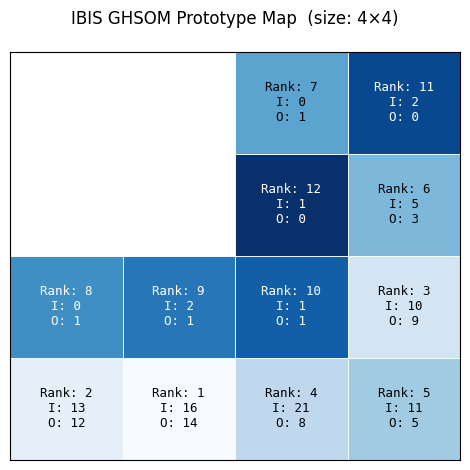

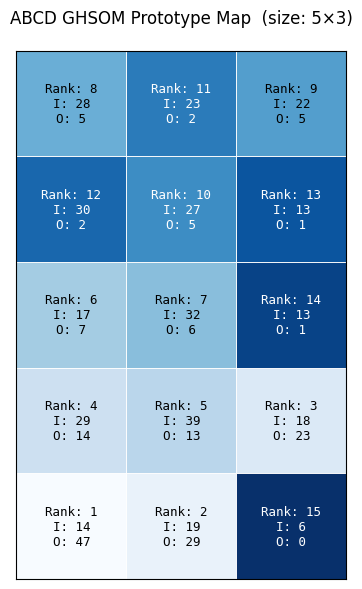

In [22]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_ghsom(proto_list, title=None, figsize=None):
    """
    Plot a GHSOM prototype map with:
      - cells shaded in one blue hue (Rank 1 = lightest)
      - annotation lines “Rank:…”, “I:…”, “O:…”
      - dynamic text color (black/white) for contrast
      - title auto-appended with map size
    """
    # 1) grid size
    positions = [p['prototype_position'] for p in proto_list]
    max_i = max(i for i, j in positions)
    max_j = max(j for i, j in positions)
    n_rows, n_cols = max_i + 1, max_j + 1

    # 2) full title with size
    full_title = (title + f"  (size: {n_rows}×{n_cols})") if title else f"Map size: {n_rows}×{n_cols}"

    # 3) prepare blue colormap (light→dark) and normalization
    ranks = [p['prototype_rank'] for p in proto_list]
    norm = mcolors.Normalize(vmin=min(ranks), vmax=max(ranks))
    cmap = plt.get_cmap('Blues')  # standard Blues: low→light, high→dark

    # 4) draw figure
    if figsize is None:
        figsize = (n_cols * 1.2, n_rows * 1.2)
    fig, ax = plt.subplots(figsize=figsize)

    for p in proto_list:
        i, j = p['prototype_position']
        rank = p['prototype_rank']
        cell_color = cmap(norm(rank))

        # draw cell
        rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1,
                             facecolor=cell_color, edgecolor='white', linewidth=0.5)
        ax.add_patch(rect)

        # determine text color by luminance
        r, g, b, _ = cell_color
        lum = 0.299*r + 0.587*g + 0.114*b
        text_color = 'black' if lum > 0.5 else 'white'

        # annotate
        ax.text(j, i,
                f"Rank: {rank}\nI: {p['inlier_count']}\nO: {p['outlier_count']}",
                ha='center', va='center',
                fontsize=9, family='monospace',
                color=text_color)

    # 5) grid lines
    for r in range(n_rows + 1):
        ax.axhline(r - 0.5, color='white', linewidth=0.5)
    for c in range(n_cols + 1):
        ax.axvline(c - 0.5, color='white', linewidth=0.5)

    # 6) finalize axes
    ax.set_xlim(-0.5, n_cols - 0.5)
    ax.set_ylim(n_rows - 0.5, -0.5)
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_title(full_title, pad=20)
    plt.tight_layout()
    return fig, ax

# Usage:
fig1, ax1 = plot_ghsom(ibis_proto_list, title="IBIS GHSOM Prototype Map")
fig2, ax2 = plot_ghsom(abcd_proto_list, title="ABCD GHSOM Prototype Map")

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_outlier_boxplots(proto_list,
                          region_scores_df,
                          map_name,
                          top_n=None,
                          chunk_size=6):
    """
    Plot outlier‐only boxplots for each region, chunked into 
    wide plots of up to `chunk_size` regions:

      - top_n filters to the strongest‐outlier prototypes
      - width scales with #regions in chunk
      - height scales with #prototypes displayed
      - uses Tab10 palette for prototype_rank
    """
    # 1) Filter to top_n prototypes
    if top_n is not None:
        proto_list = [p for p in proto_list if p["prototype_rank"] <= top_n]

    # 2) Build ID→prototype_rank map (outliers only)
    rows = []
    for p in proto_list:
        r    = p["prototype_rank"]
        df_o = p["outliers"]
        # detect ID column robustly
        cols = [c.lower() for c in df_o.columns]
        if "identifier" in cols:
            sid = df_o[df_o.columns[cols.index("identifier")]]
        elif "id" in cols:
            sid = df_o[df_o.columns[cols.index("id")]]
        else:
            raise KeyError(f"Outliers DF missing ID field, found {df_o.columns.tolist()}")
        rows.append(pd.DataFrame({"ID": sid, "prototype_rank": r}))
    mapping_df = pd.concat(rows, ignore_index=True).drop_duplicates("ID")

    # 3) Merge into your scores
    merged = region_scores_df.merge(mapping_df, on="ID", how="inner")
    merged["prototype_rank"] = merged["prototype_rank"].astype(int)

    # 4) Identify region columns
    exclude     = {"ID","Identifier","Cohort","prototype_rank","prototype_position"}
    region_cols = [c for c in merged.columns if c not in exclude]

    # 5) Build Tab10 palette per rank
    ranks       = sorted(merged["prototype_rank"].unique())
    tab10       = sns.color_palette("tab10", n_colors=len(ranks))
    palette     = {r: tab10[i] for i, r in enumerate(ranks)}

    # 6) Now chunk regions and plot
    for idx, regs in enumerate(
        [region_cols[i:i+chunk_size] for i in range(0, len(region_cols), chunk_size)],
        start=1
    ):
        if not regs:
            continue

        # melt to long form
        plot_df = (
            merged[["prototype_rank"] + regs]
            .melt(id_vars="prototype_rank", var_name="Region", value_name="Score")
        )

        # dynamic sizing
        n_regions    = len(regs)
        n_prototypes = len(ranks)
        fig_w = 2 * n_regions
        fig_h = max(4, 0.5 * n_prototypes)  

        fig, ax = plt.subplots(figsize=(fig_w, fig_h))
        sns.boxplot(
            data=plot_df,
            x="Region",
            y="Score",
            hue="prototype_rank",
            palette=palette,
            ax=ax,
            dodge=True,
            showfliers=False
        )

        # styling
        start = (idx - 1)*chunk_size + 1
        end   = min(idx*chunk_size, len(region_cols))
        ax.set_title(f"{map_name} Outlier Distributions — Regions {start}–{end}", pad=14)
        ax.tick_params(axis="x", rotation=45)
        ax.set_xlabel("")
        ax.set_ylabel("Score")
        ax.legend(
            title="Prototype Rank",
            bbox_to_anchor=(1.02, 1),
            loc="upper left",
            borderaxespad=0
        )

        plt.tight_layout()
        plt.show()

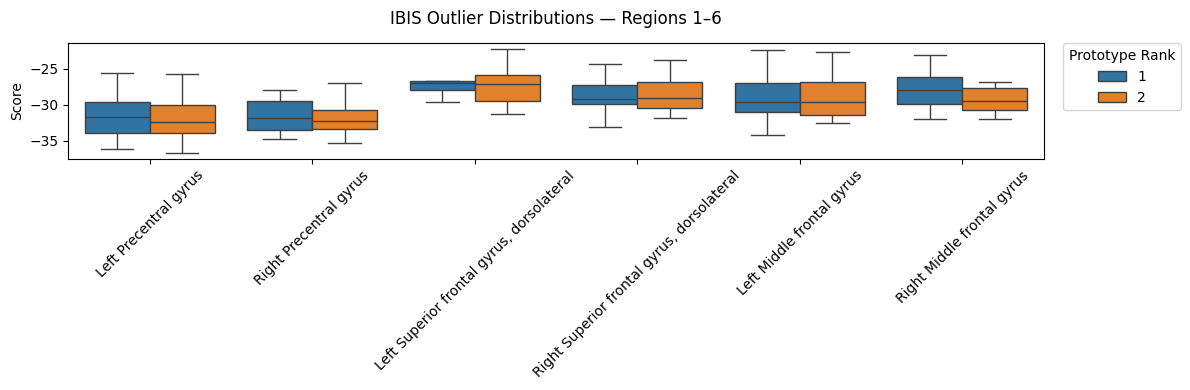

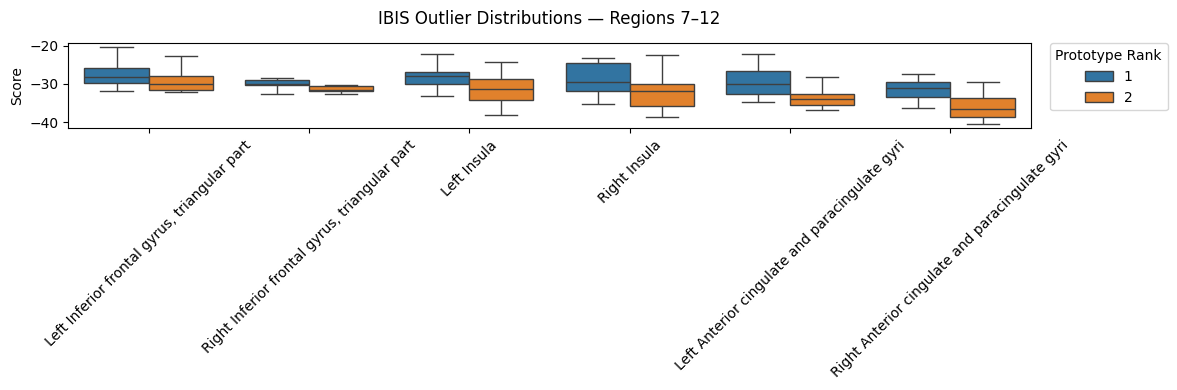

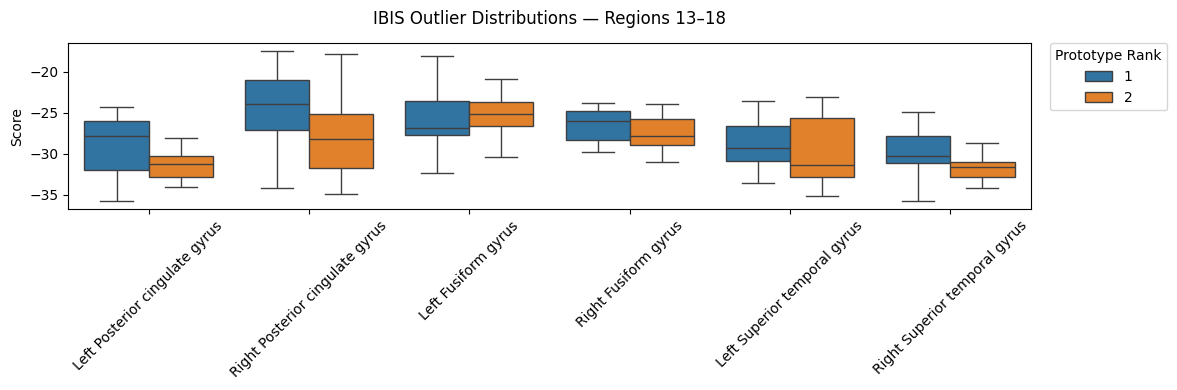

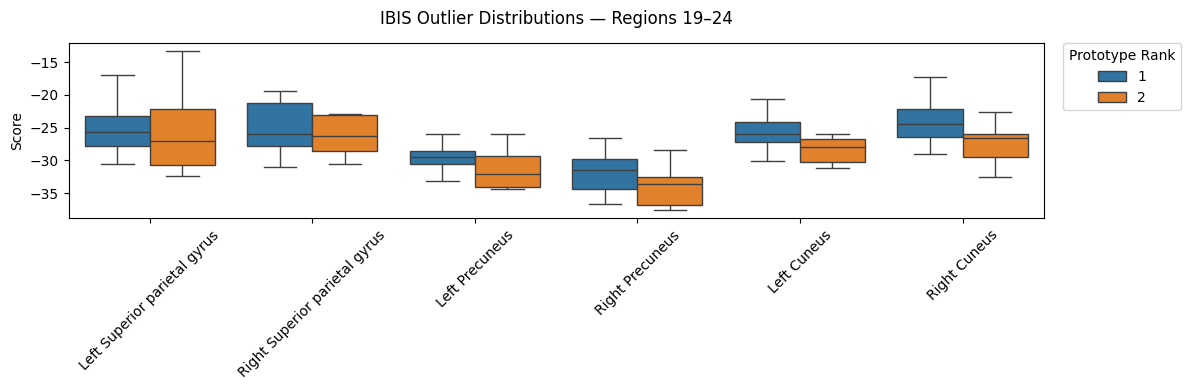

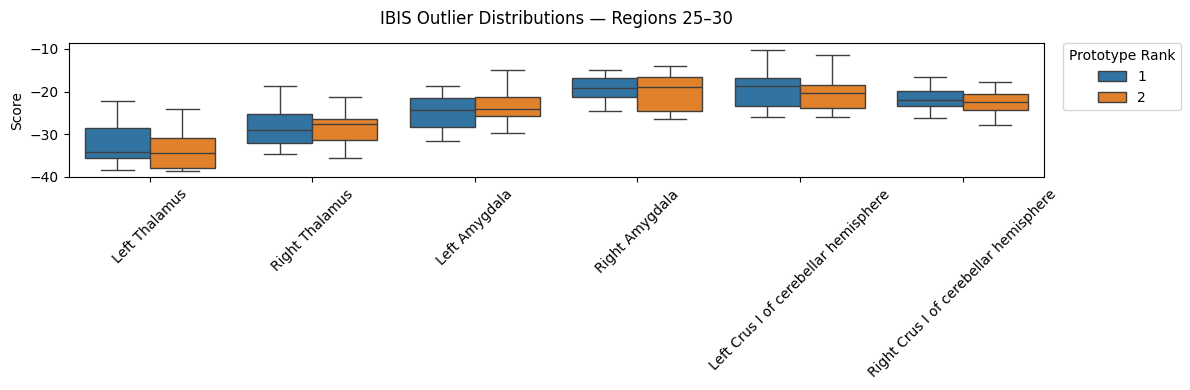

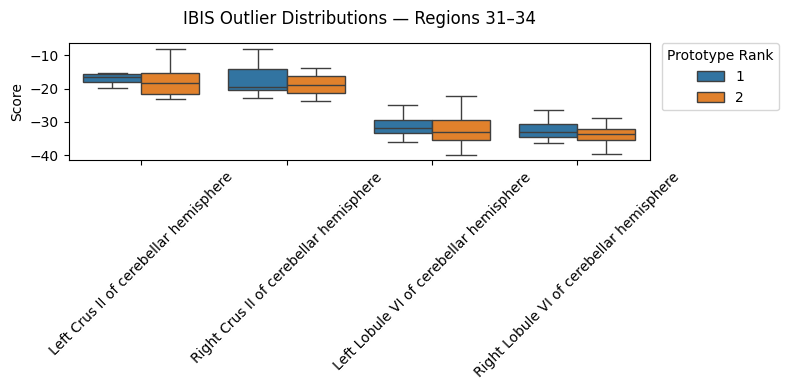

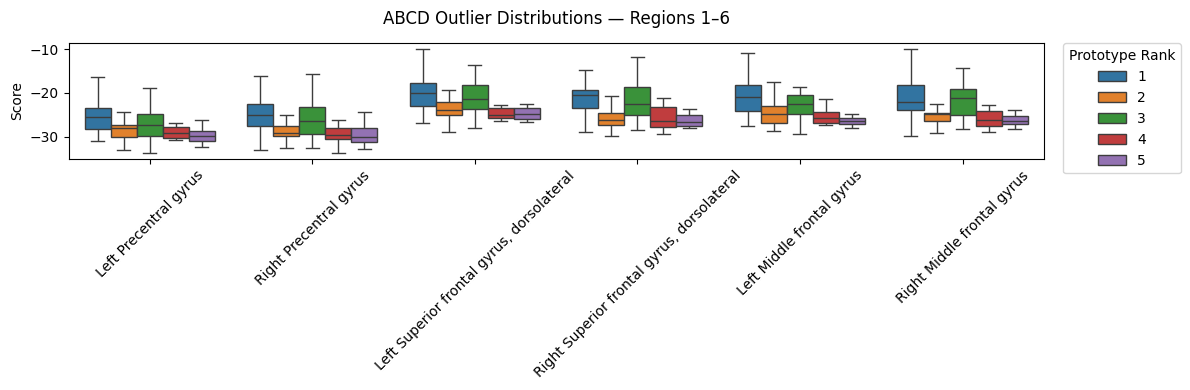

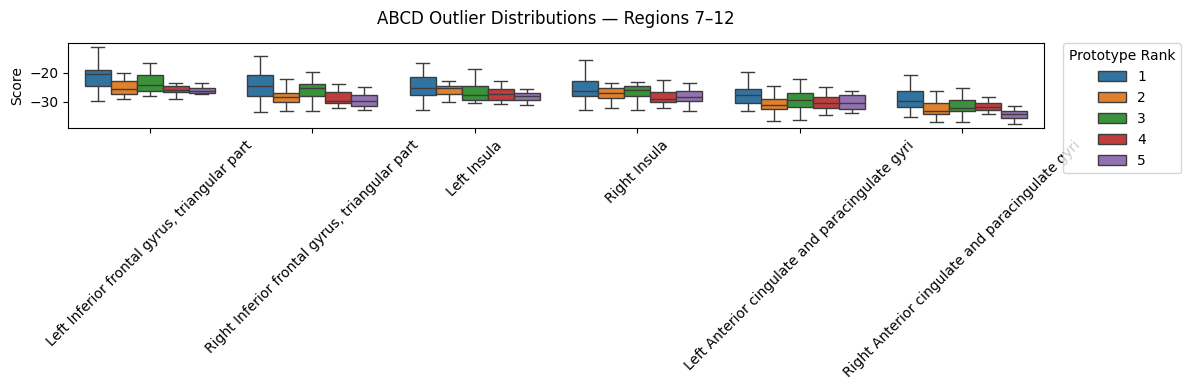

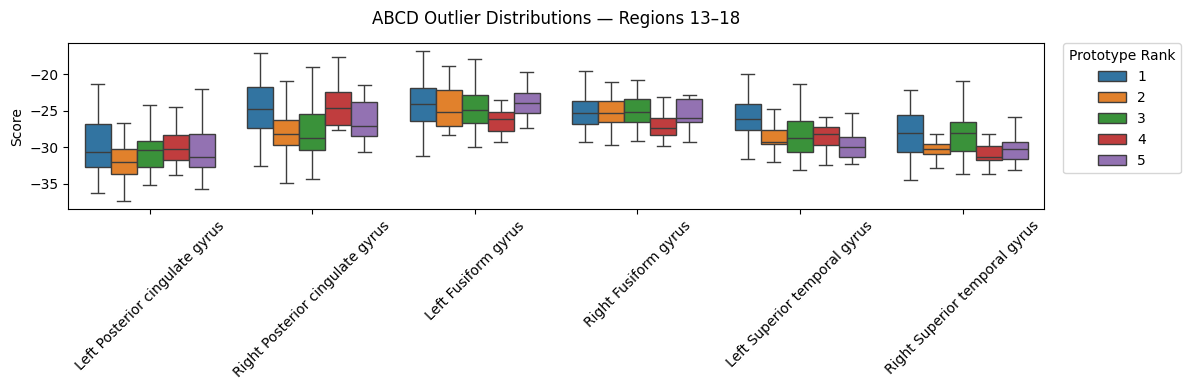

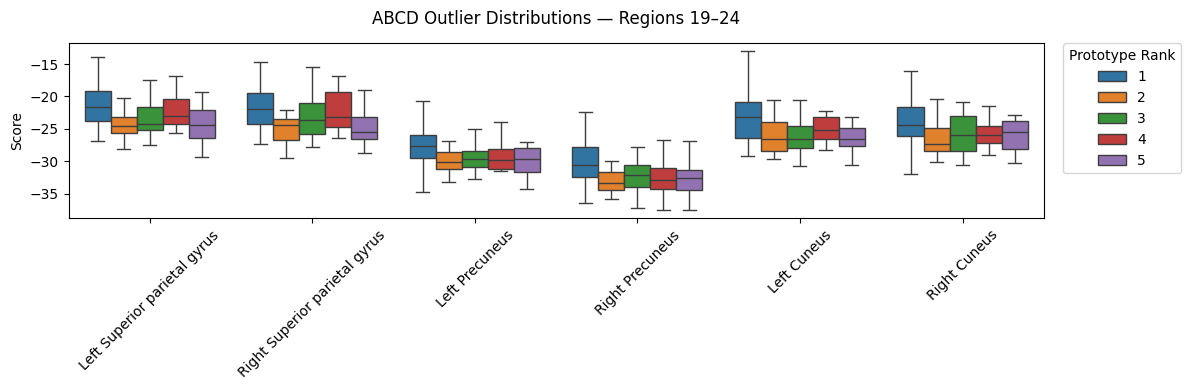

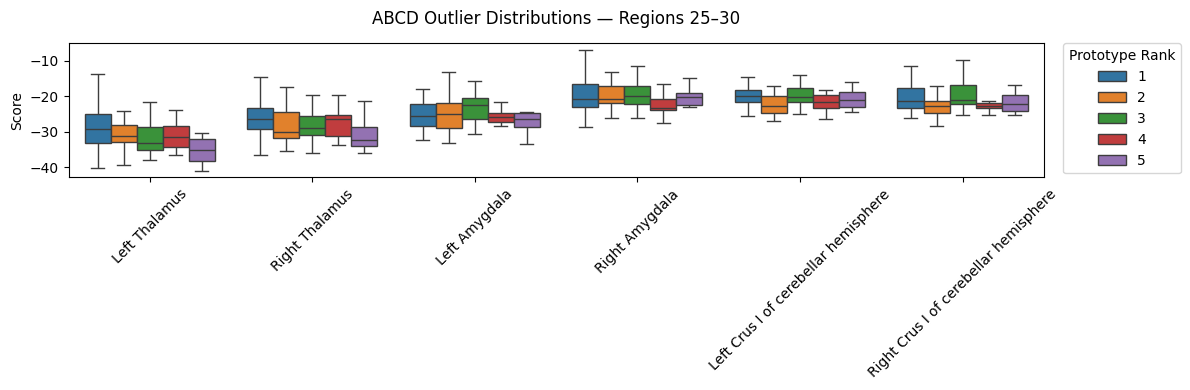

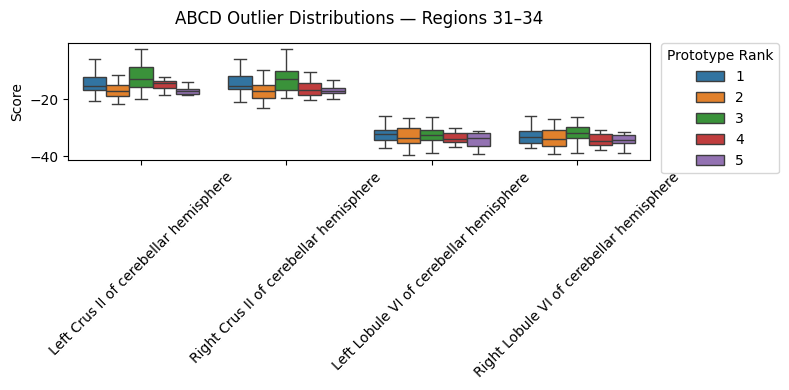

In [24]:
# Only prototypes 1–3, 6 regions per plot:
plot_outlier_boxplots(ibis_proto_list, region_scores_harmonized, "IBIS", top_n=2)

# All prototypes, ABCD, 6 regions per plot:
plot_outlier_boxplots(abcd_proto_list, region_scores_harmonized, "ABCD", top_n=5)

In [25]:
import pandas as pd

# --- Revised compute_outlier_percentiles, robust to prototypes with no inliers ---
def compute_outlier_percentiles(proto_list, scores_df):
    """
    For each prototype in proto_list, compute each outlier’s percentile for each region
    relative to its inliers.  If a prototype has no inliers, all percentiles → NaN.
    """
    region_cols = [c for c in scores_df.columns if c not in ("ID", "Cohort")]
    new_list = []

    for p in proto_list:
        df_in  = p["inliers"]
        df_out = p["outliers"]

        # detect outlier‐ID column
        if "Identifier" in df_out.columns:
            id_col_out = "Identifier"
        elif "ID" in df_out.columns:
            id_col_out = "ID"
        else:
            raise KeyError(f"No ID column in outliers for prototype {p['prototype_position']}")

        # slice outlier scores
        out_scores = scores_df[scores_df["ID"].isin(df_out[id_col_out])].copy()

        # determine inlier baseline
        if ("Identifier" in df_in.columns or "ID" in df_in.columns) and not df_in.empty:
            id_col_in = "Identifier" if "Identifier" in df_in.columns else "ID"
            in_scores = scores_df[scores_df["ID"].isin(df_in[id_col_in])]
        else:
            # no inliers → empty baseline
            in_scores = scores_df.iloc[0:0]  

        # compute percentiles
        for rc in region_cols:
            baseline = in_scores[rc].dropna()
            if baseline.empty:
                out_scores[rc + "_pct"] = float("nan")
            else:
                out_scores[rc + "_pct"] = out_scores[rc].apply(
                    lambda v: (baseline <= v).mean()
                )

        pct_df = out_scores[["ID"] + [rc + "_pct" for rc in region_cols]]
        p2 = p.copy()
        p2["outlier_percentiles"] = pct_df
        new_list.append(p2)

    return new_list

# --- Select top prototypes and compute percentiles ---

# Assume ibis_proto_list and abcd_proto_list already exist
ibis_top2  = ibis_proto_list[:2]
abcd_top5  = abcd_proto_list[:5]

ibis_proto_list_pct  = compute_outlier_percentiles(ibis_top2, region_scores_harmonized)
abcd_proto_list_pct  = compute_outlier_percentiles(abcd_top5, region_scores_harmonized)

In [26]:
def plot_outlier_percentile_boxplots(proto_list_pct,
                                     map_name,
                                     top_n=None,
                                     chunk_size=6):
    """
    Plot outlier percentiles boxplots:
      - top_n: include ranks 1..top_n
      - chunk_size: regions per plot
      - dynamic sizing: fig_w=2*n_regions, fig_h=max(4,0.5*n_protos)
      - Tab10 palette per prototype_rank
    """
    # filter to top_n if needed
    if top_n is not None:
        proto_list_pct = [p for p in proto_list_pct 
                          if p["prototype_rank"] <= top_n]

    # concatenate all percentile DataFrames
    df_all = pd.concat([
        p["outlier_percentiles"].assign(prototype_rank=p["prototype_rank"])
        for p in proto_list_pct
    ], ignore_index=True)
    df_all["prototype_rank"] = df_all["prototype_rank"].astype(int)

    pct_cols = [c for c in df_all.columns if c.endswith("_pct")]
    ranks    = sorted(df_all["prototype_rank"].unique())
    colors   = sns.color_palette("tab10", n_colors=len(ranks))
    palette  = {r: colors[i] for i, r in enumerate(ranks)}

    # chunk and plot
    for idx, chunk in enumerate(
        [pct_cols[i:i+chunk_size] for i in range(0, len(pct_cols), chunk_size)],
        start=1
    ):
        if not chunk:
            continue

        plot_df = (
            df_all[["prototype_rank"] + chunk]
            .melt(id_vars="prototype_rank",
                  var_name="Region_pct",
                  value_name="Percentile")
        )
        plot_df["Region"] = plot_df["Region_pct"].str[:-4]

        n_regions = len(chunk)
        n_protos  = len(ranks)
        fig_w     = 2 * n_regions
        fig_h     = max(4, 0.5 * n_protos)

        fig, ax = plt.subplots(figsize=(fig_w, fig_h))
        sns.boxplot(
            data=plot_df,
            x="Region",
            y="Percentile",
            hue="prototype_rank",
            palette=palette,
            dodge=True,
            showfliers=False,
            ax=ax
        )

        start = (idx - 1) * chunk_size + 1
        end   = min(idx * chunk_size, len(pct_cols))
        ax.set_title(f"{map_name} Outlier Percentiles — Regions {start}–{end}", pad=14)
        ax.tick_params(axis="x", rotation=45)
        ax.set_xlabel("")
        ax.set_ylabel("Percentile")
        ax.legend(
            title="Prototype Rank",
            bbox_to_anchor=(1.02, 1),
            loc="upper left"
        )

        plt.tight_layout()
        plt.show()


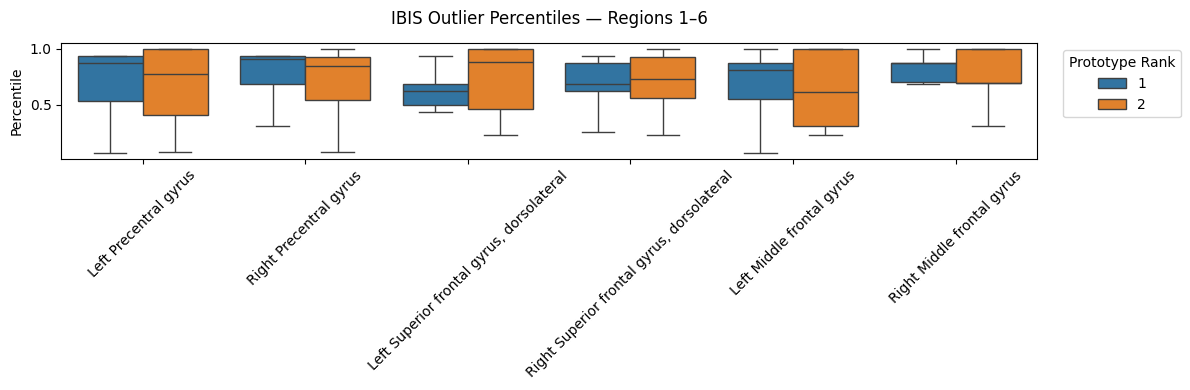

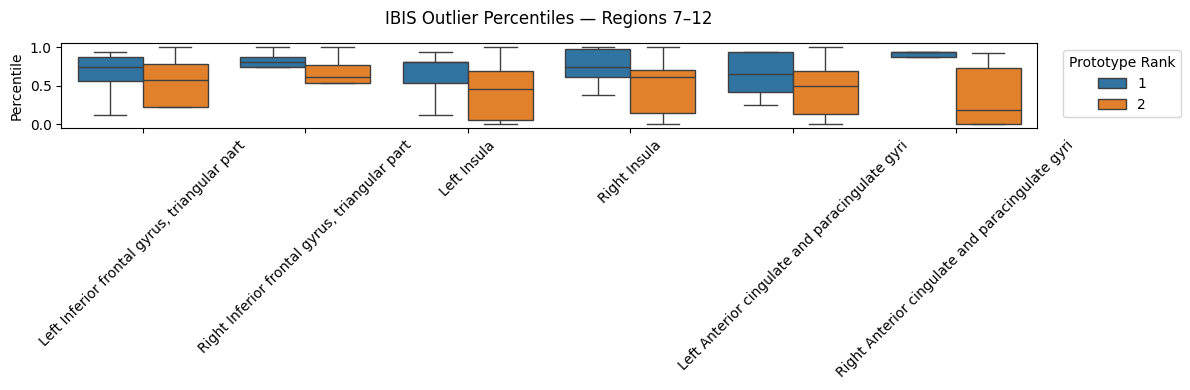

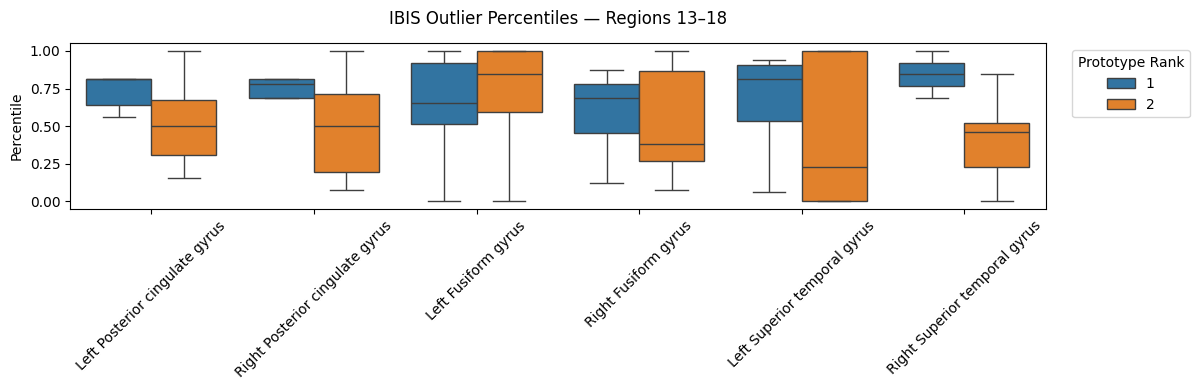

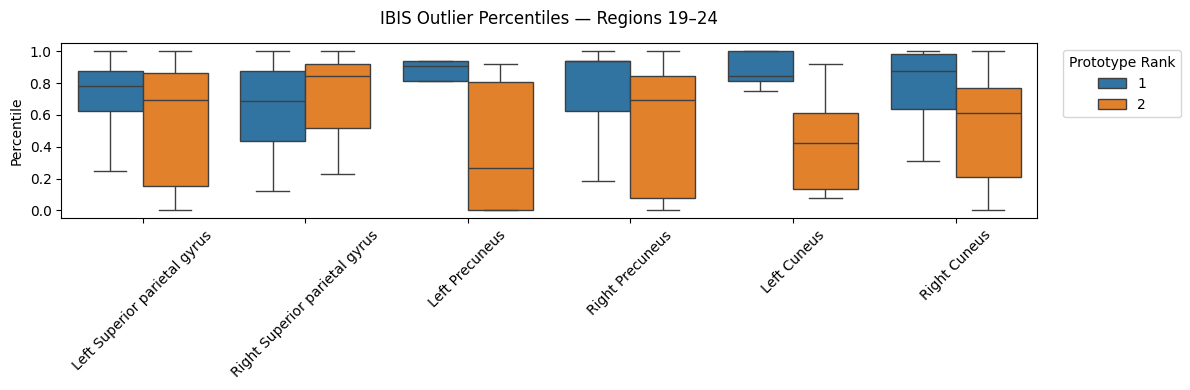

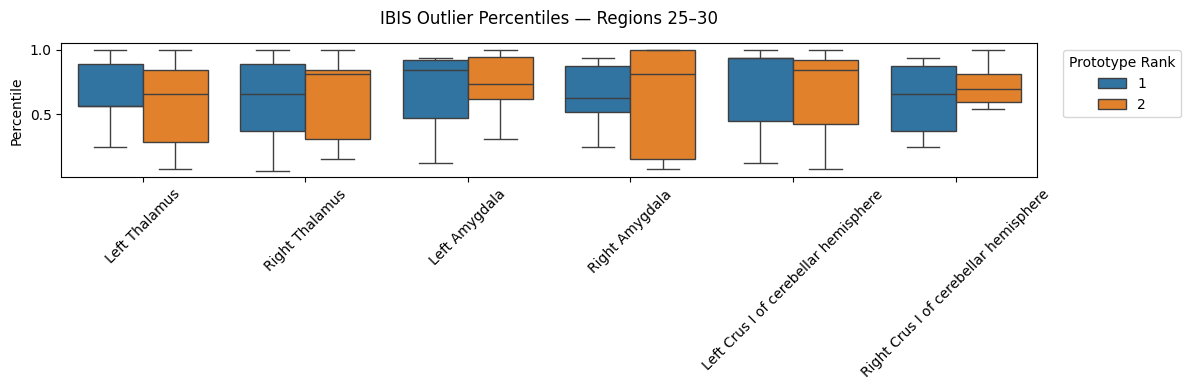

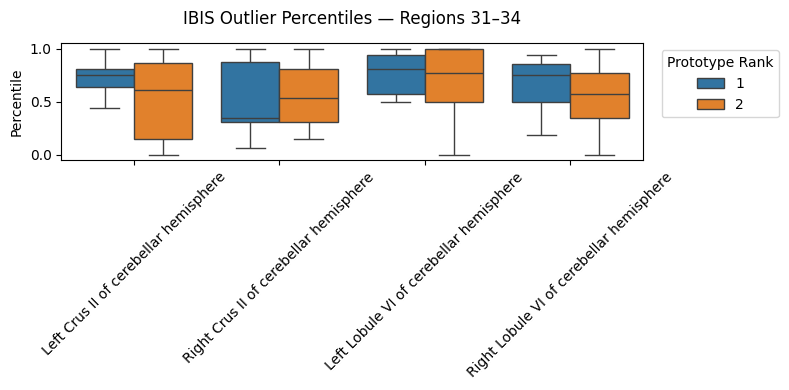

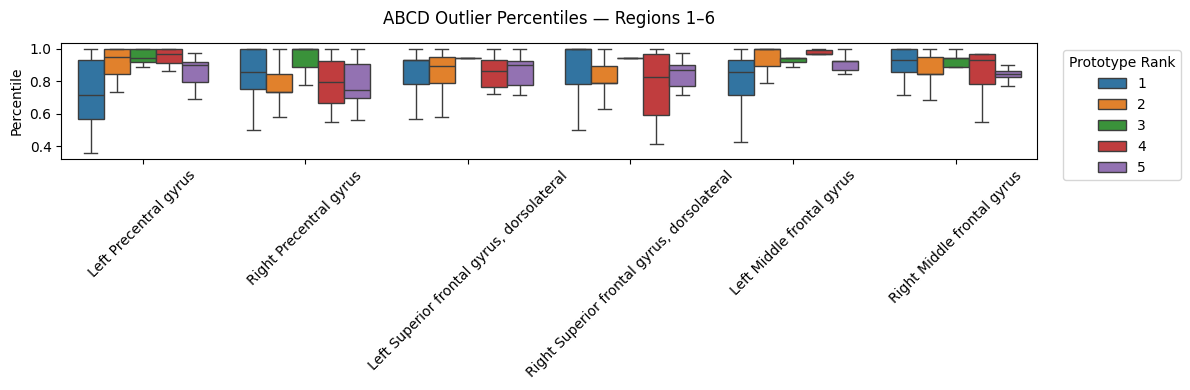

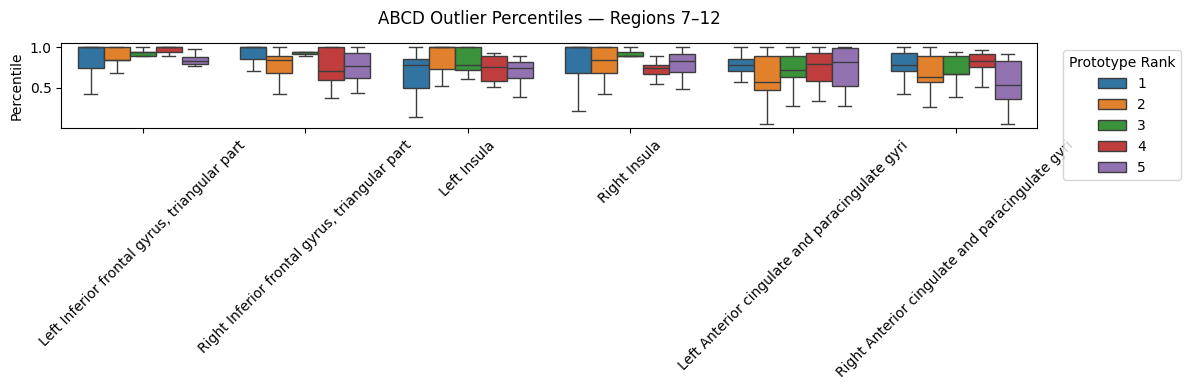

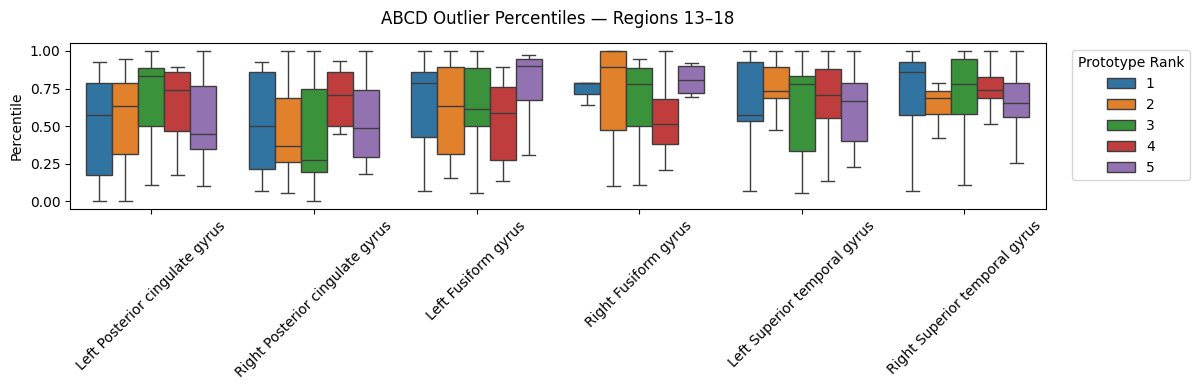

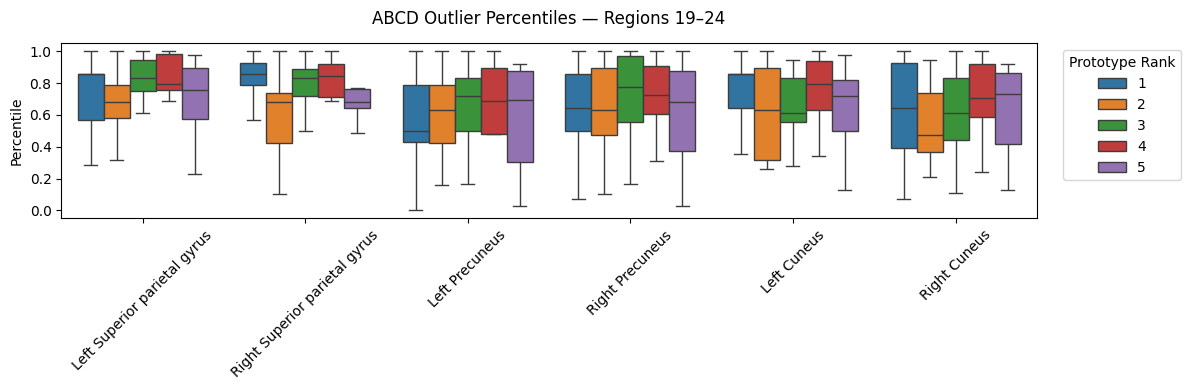

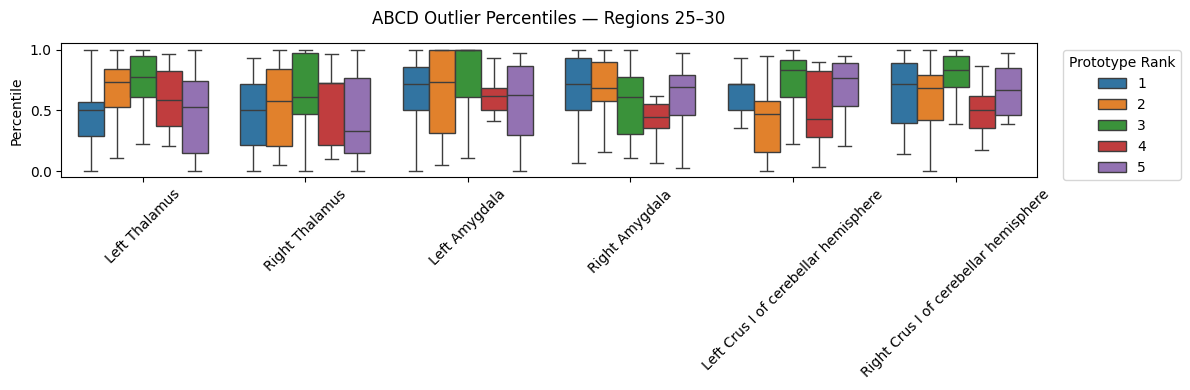

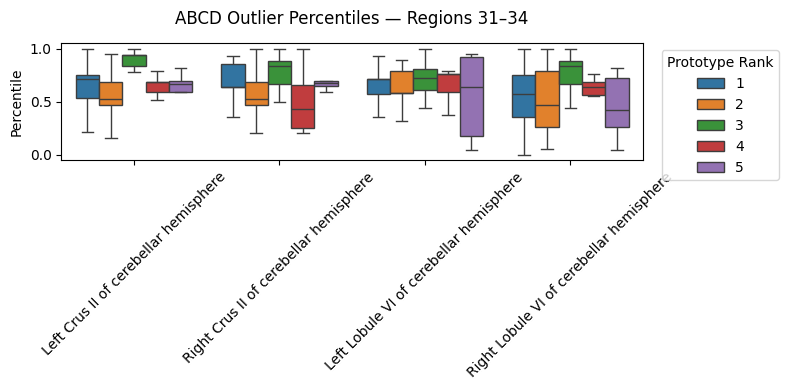

In [27]:
plot_outlier_percentile_boxplots(ibis_proto_list_pct, "IBIS", top_n=None, chunk_size=6)
plot_outlier_percentile_boxplots(abcd_proto_list_pct, "ABCD", top_n=None, chunk_size=6)

### Comparison Raw vs Percentiles

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compare_raw_vs_pct_chunked(ibis_list, ibis_list_pct,
                               scores_df, map_name,
                               chunk_size=6, figsize=(12,6)):
    """
    For all region columns in scores_df (excluding ID/Cohort),
    compare raw vs percentile side-by-side in chunks of chunk_size.
    """
    # 1) auto-detect your region columns
    exclude = {"ID", "Cohort"}
    region_cols = [c for c in scores_df.columns if c not in exclude]

    # 2) pre-build your palette once
    ranks = sorted(p["prototype_rank"] for p in ibis_list)
    colors = sns.color_palette("tab10", n_colors=len(ranks))
    palette = {r: colors[i] for i, r in enumerate(ranks)}

    # 3) chunk through region_cols
    for i in range(0, len(region_cols), chunk_size):
        chunk = region_cols[i:i+chunk_size]
        if not chunk:
            continue

        # build raw_long
        raw_dfs = []
        for p in ibis_list:
            all_ids = pd.concat([p["inliers"], p["outliers"]], ignore_index=True)
            # pick ID column
            key = "Identifier" if "Identifier" in all_ids.columns else "ID"
            df = (scores_df[scores_df["ID"].isin(all_ids[key])]
                  .assign(prototype_rank=p["prototype_rank"]))
            raw_dfs.append(df[["prototype_rank"] + chunk]
                           .melt(id_vars="prototype_rank",
                                 var_name="Region", value_name="RawScore"))
        raw_long = pd.concat(raw_dfs, ignore_index=True)

        # build pct_long
        pct_dfs = []
        for p in ibis_list_pct:
            df = p["outlier_percentiles"].copy()
            df["prototype_rank"] = p["prototype_rank"]
            cols = [r + "_pct" for r in chunk]
            pct_dfs.append(df[["prototype_rank"] + cols]
                           .melt(id_vars="prototype_rank",
                                 var_name="Region_pct", value_name="Pct"))
        pct_long = pd.concat(pct_dfs, ignore_index=True)
        pct_long["Region"] = pct_long["Region_pct"].str[:-4]

        # merge raw and pct for plotting
        merged = raw_long.merge(pct_long, on=["prototype_rank","Region"])

        # 4) plot side-by-side
        fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=False)
        sns.boxplot(data=merged, x="Region", y="RawScore", hue="prototype_rank",
                    palette=palette, ax=axes[0], dodge=True, showfliers=False)
        axes[0].set_title(f"{map_name} Raw Scores (Regions {i+1}–{i+len(chunk)})")
        axes[0].tick_params(axis="x", rotation=45)
        axes[0].set_xlabel("")

        sns.boxplot(data=merged, x="Region", y="Pct", hue="prototype_rank",
                    palette=palette, ax=axes[1], dodge=True, showfliers=False)
        axes[1].set_title(f"{map_name} Percentiles (Regions {i+1}–{i+len(chunk)})")
        axes[1].tick_params(axis="x", rotation=45)
        axes[1].set_xlabel("")

        for ax in axes:
            ax.legend(title="Rank", bbox_to_anchor=(1.05,1), loc="upper left")
        plt.tight_layout()
        plt.show()

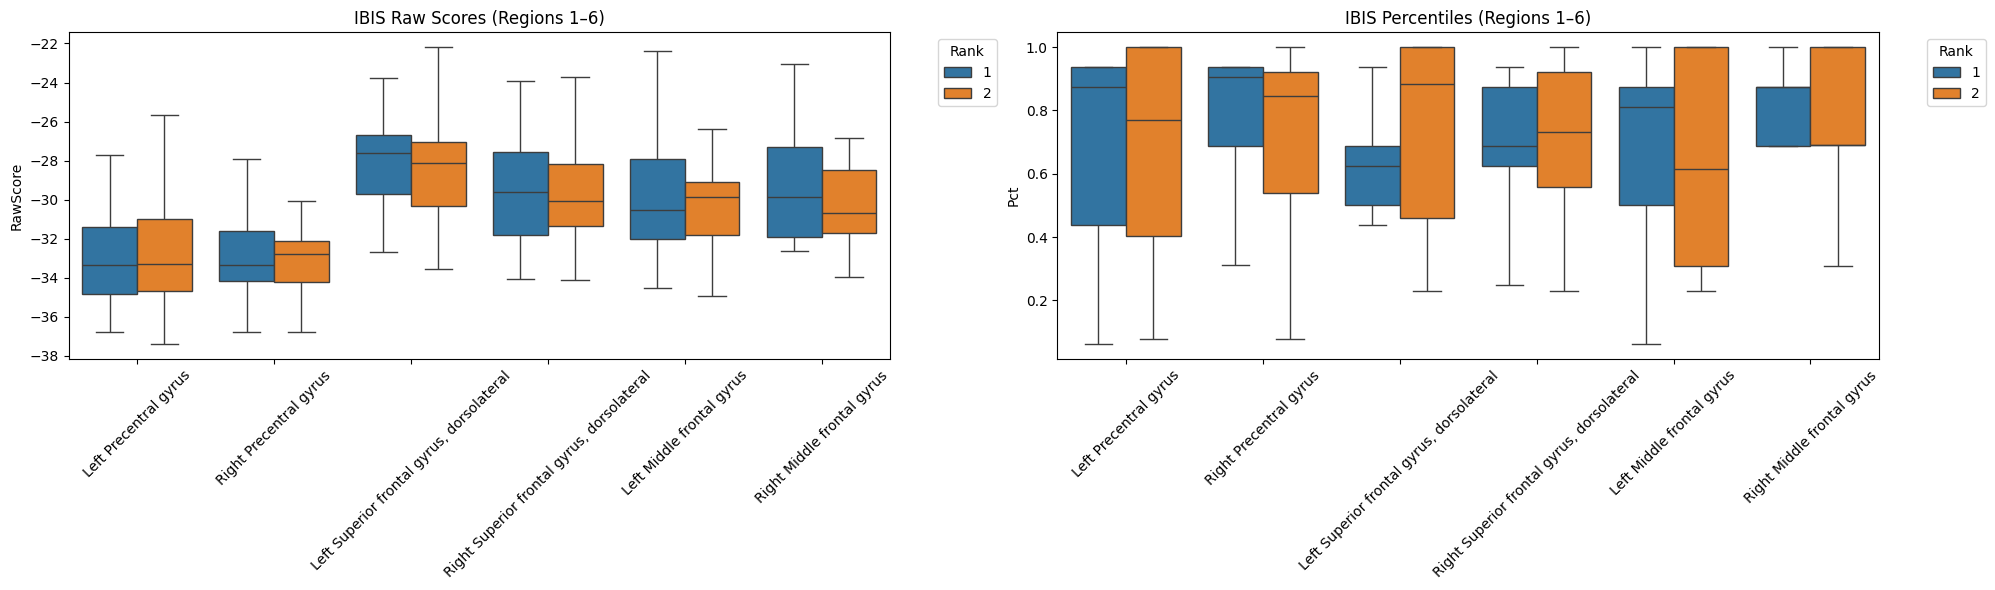

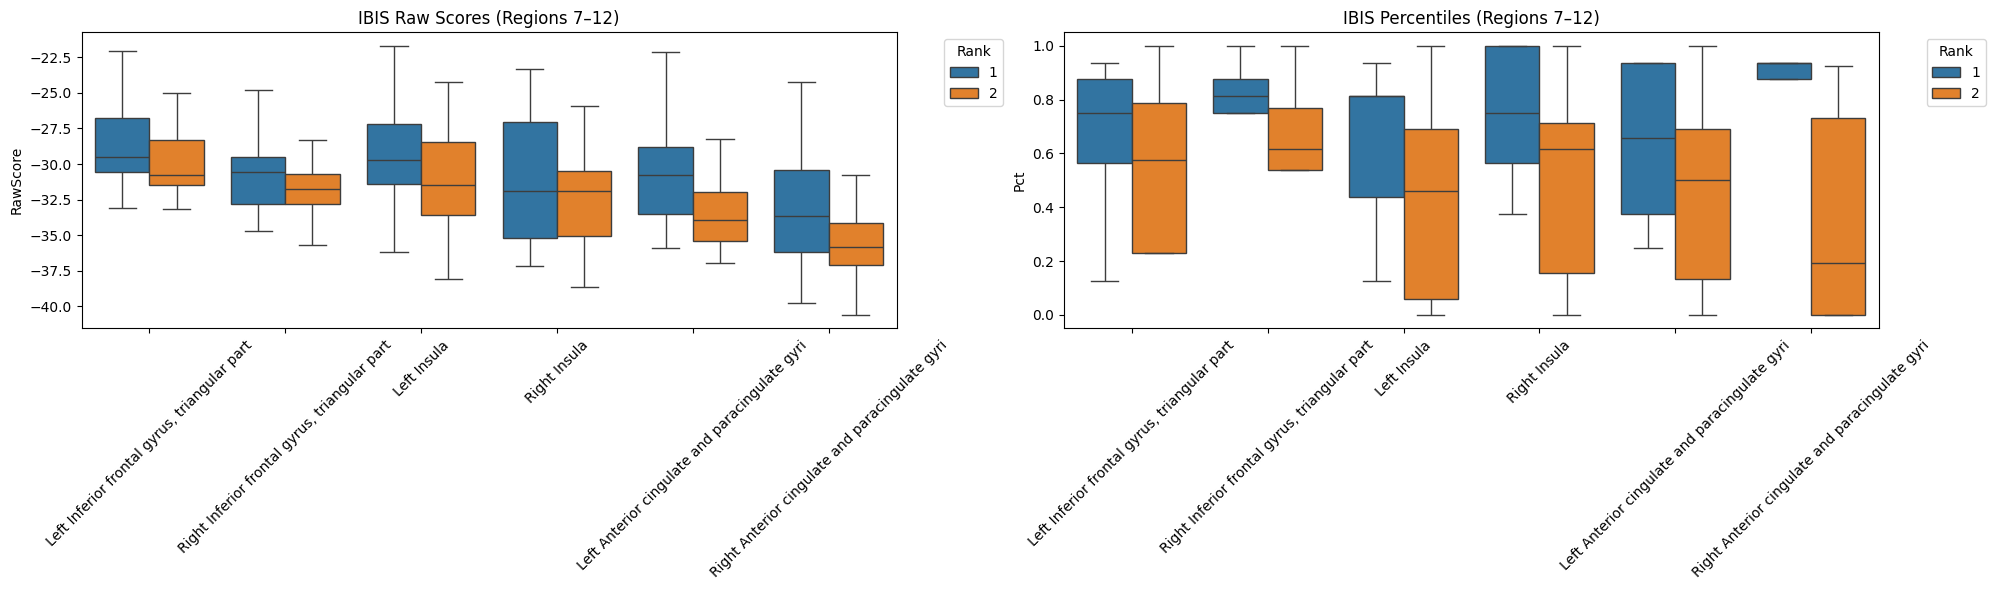

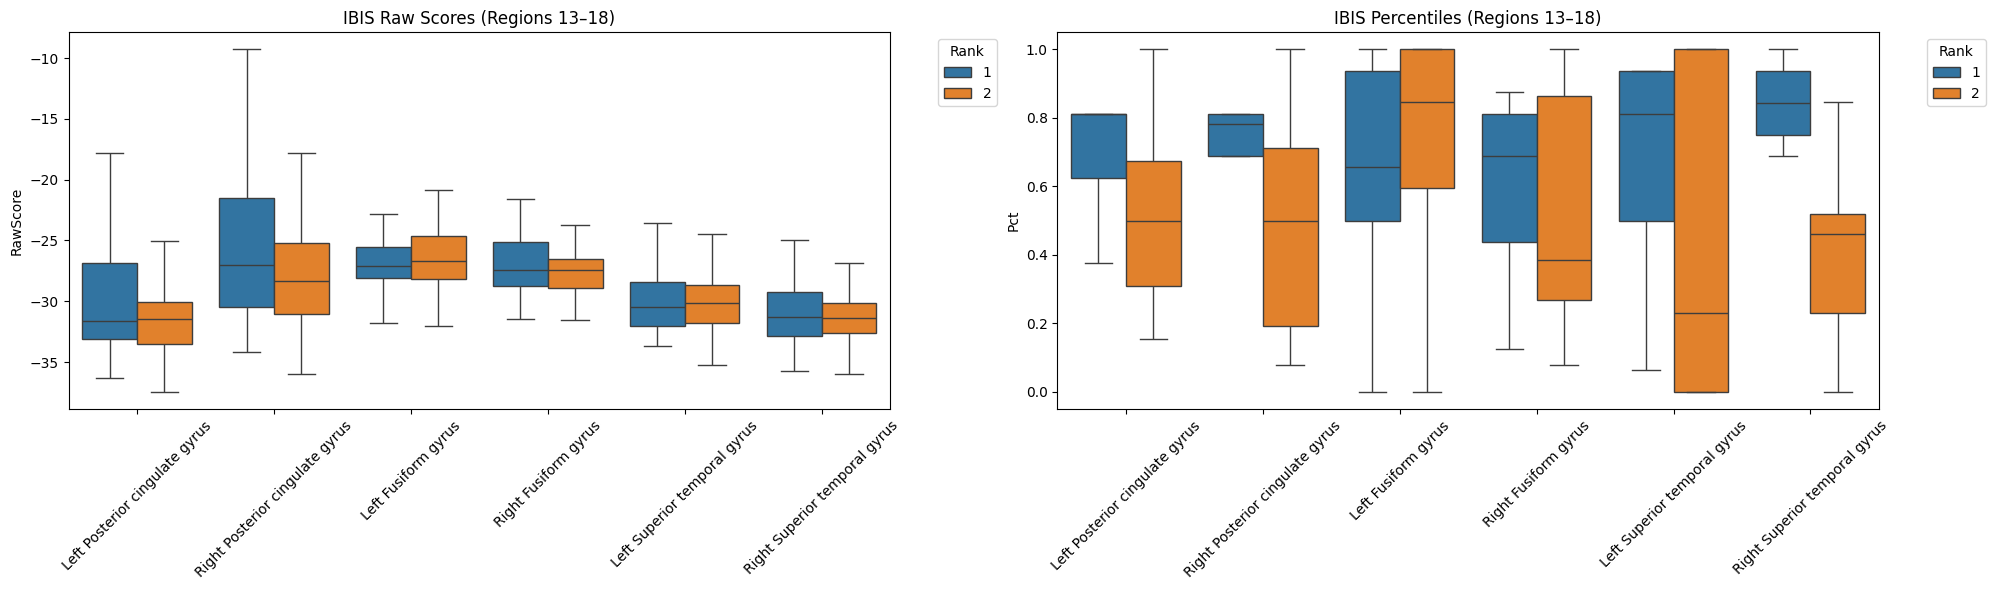

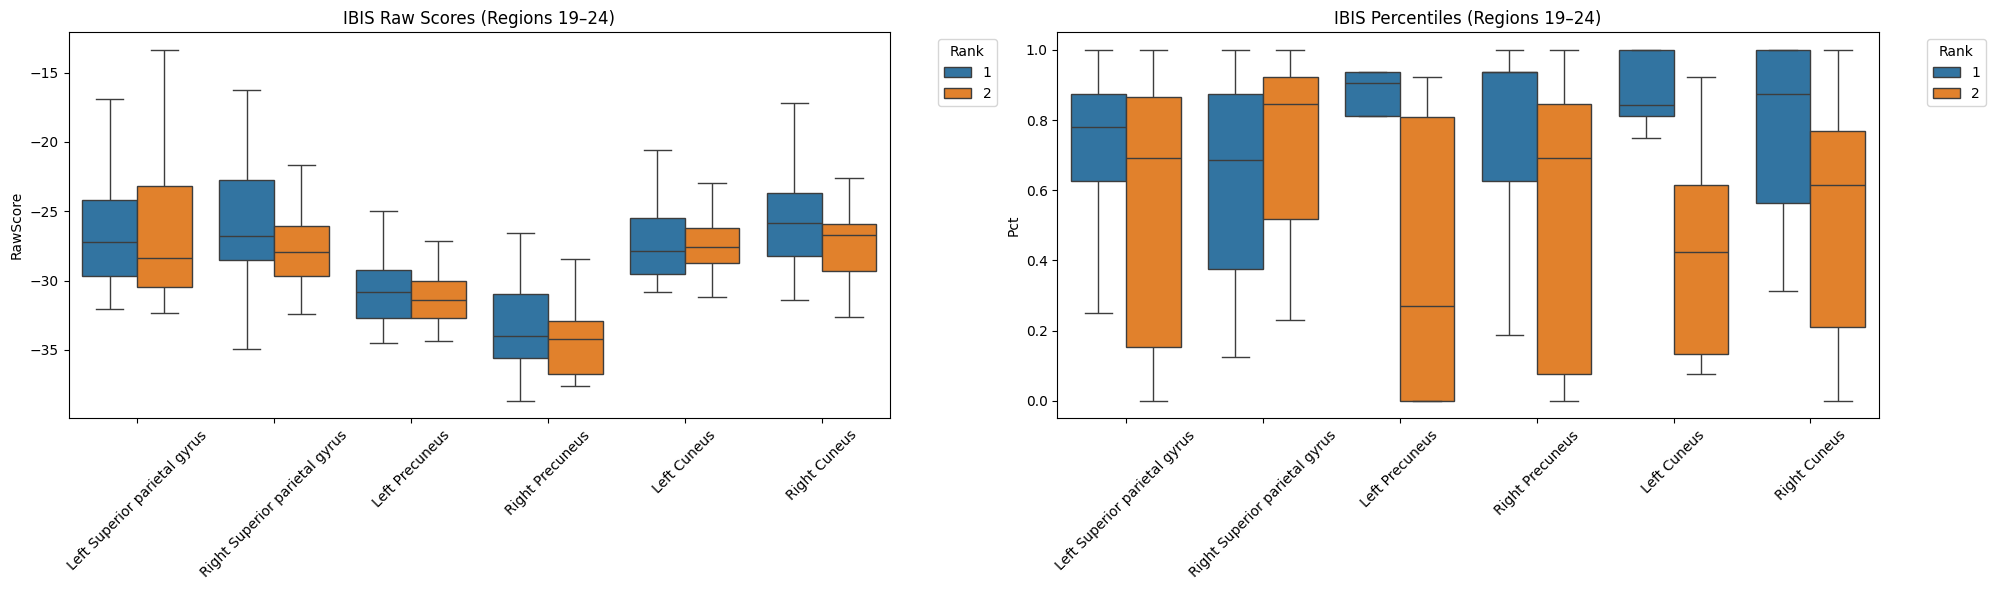

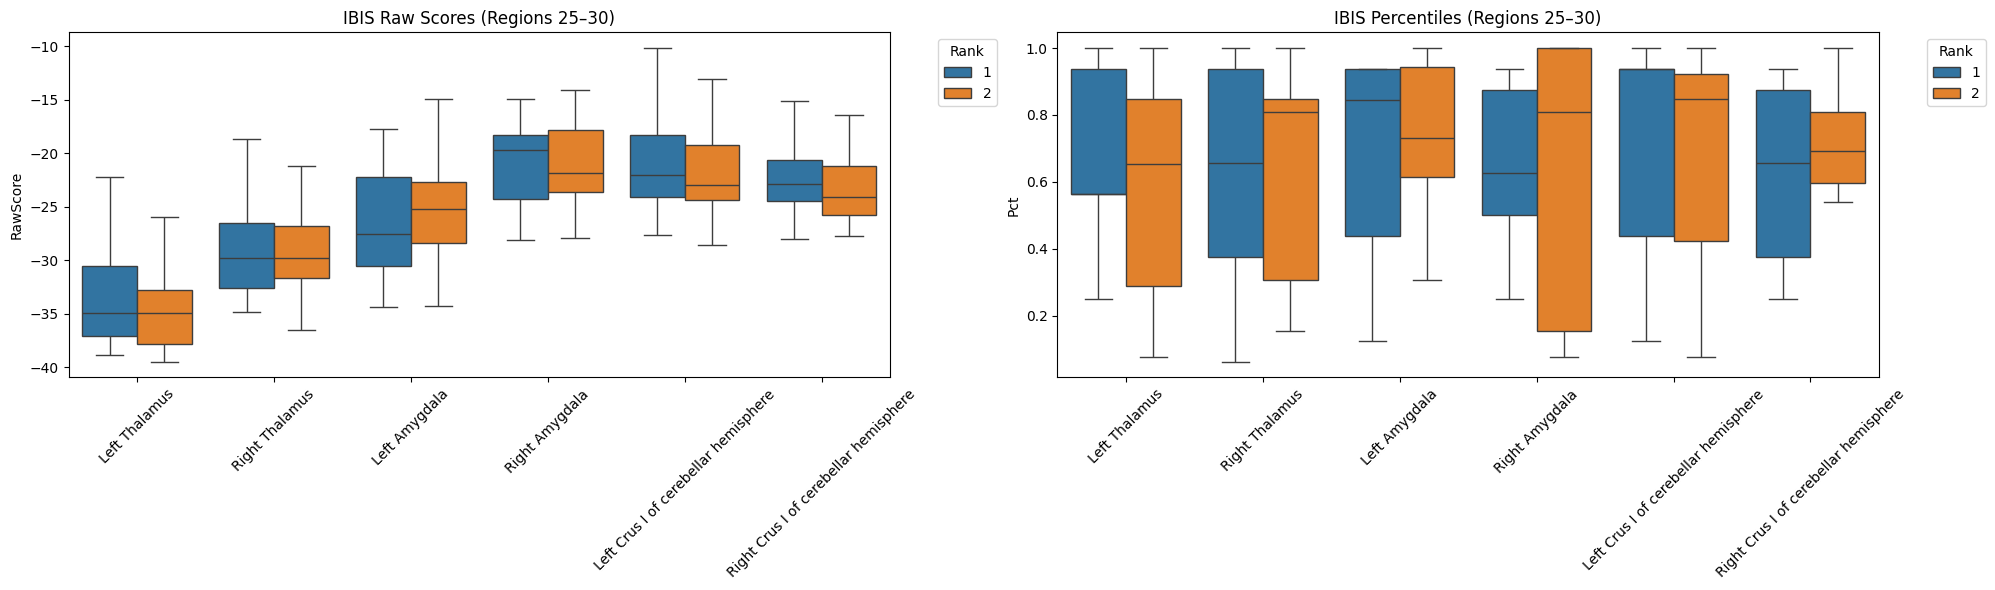

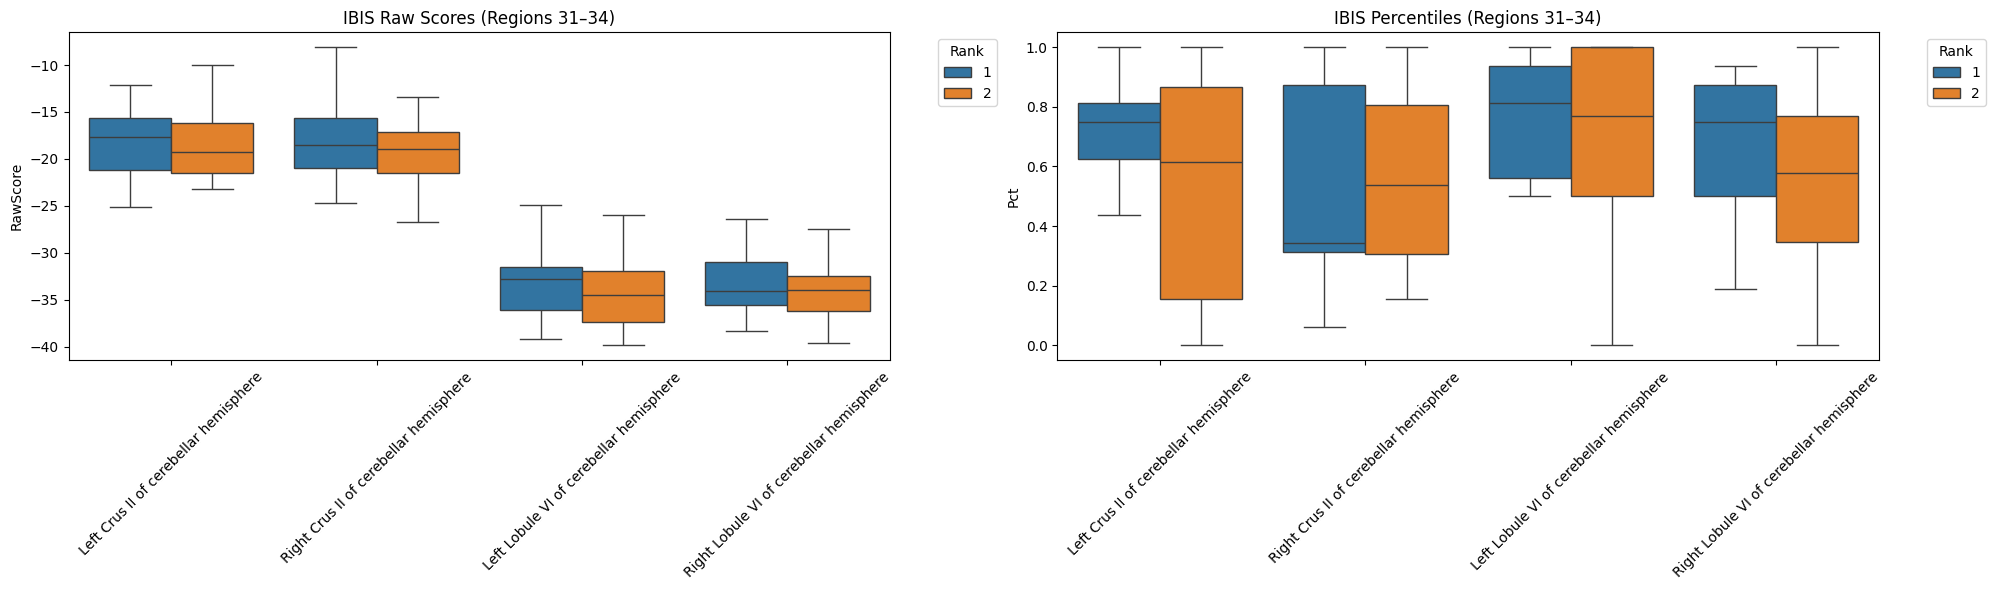

In [29]:
compare_raw_vs_pct_chunked(
    ibis_proto_list,     # raw inlier/outlier list
    ibis_proto_list_pct, # percentile‐augmented list
    region_scores_harmonized,
    "IBIS",
    chunk_size=6,
    figsize=(20,6)
)

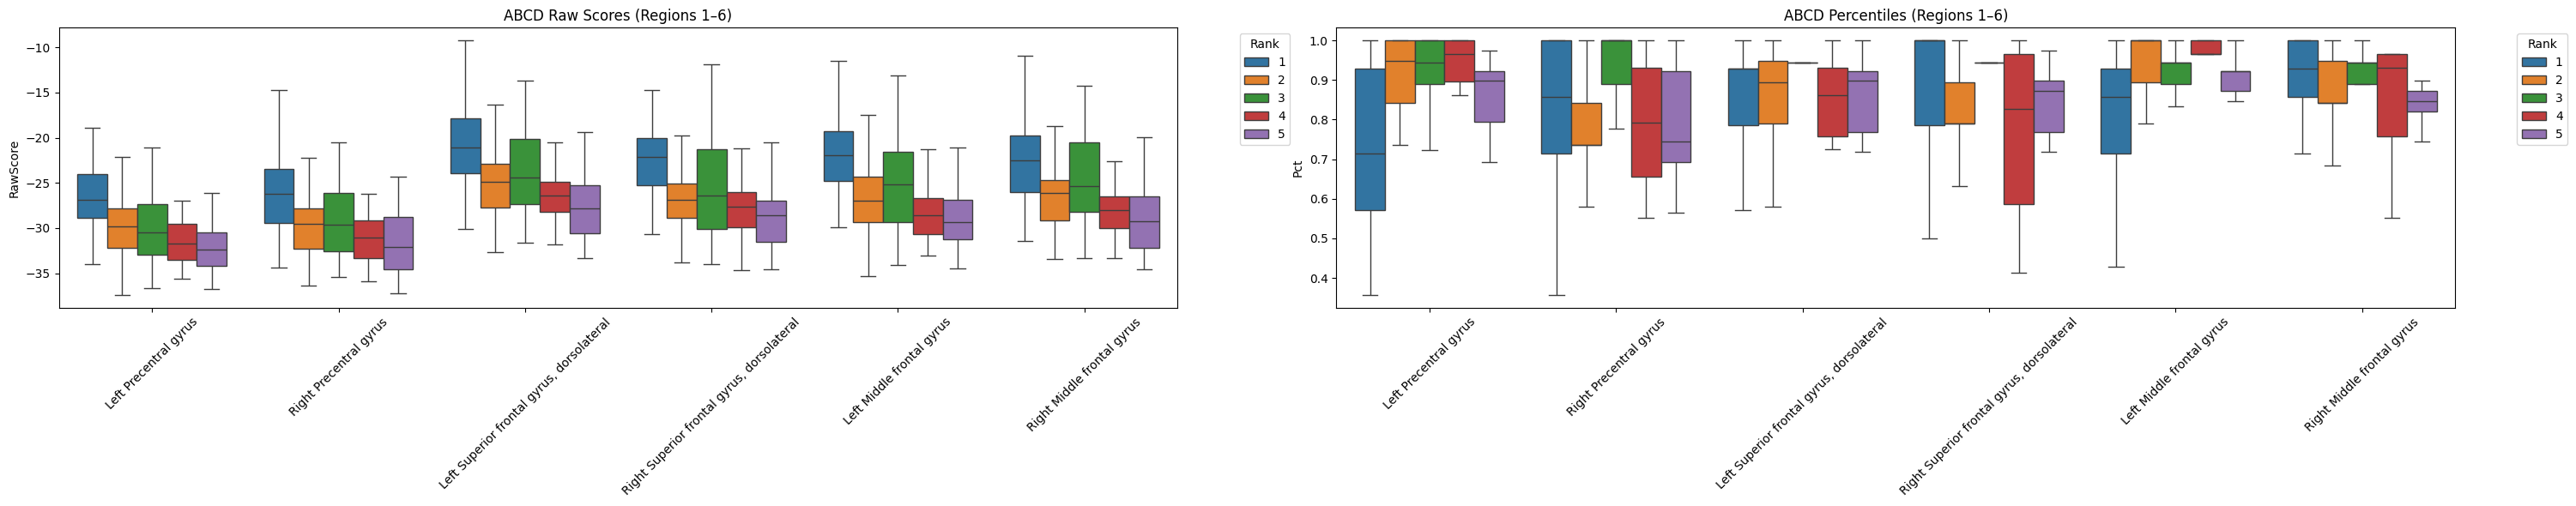

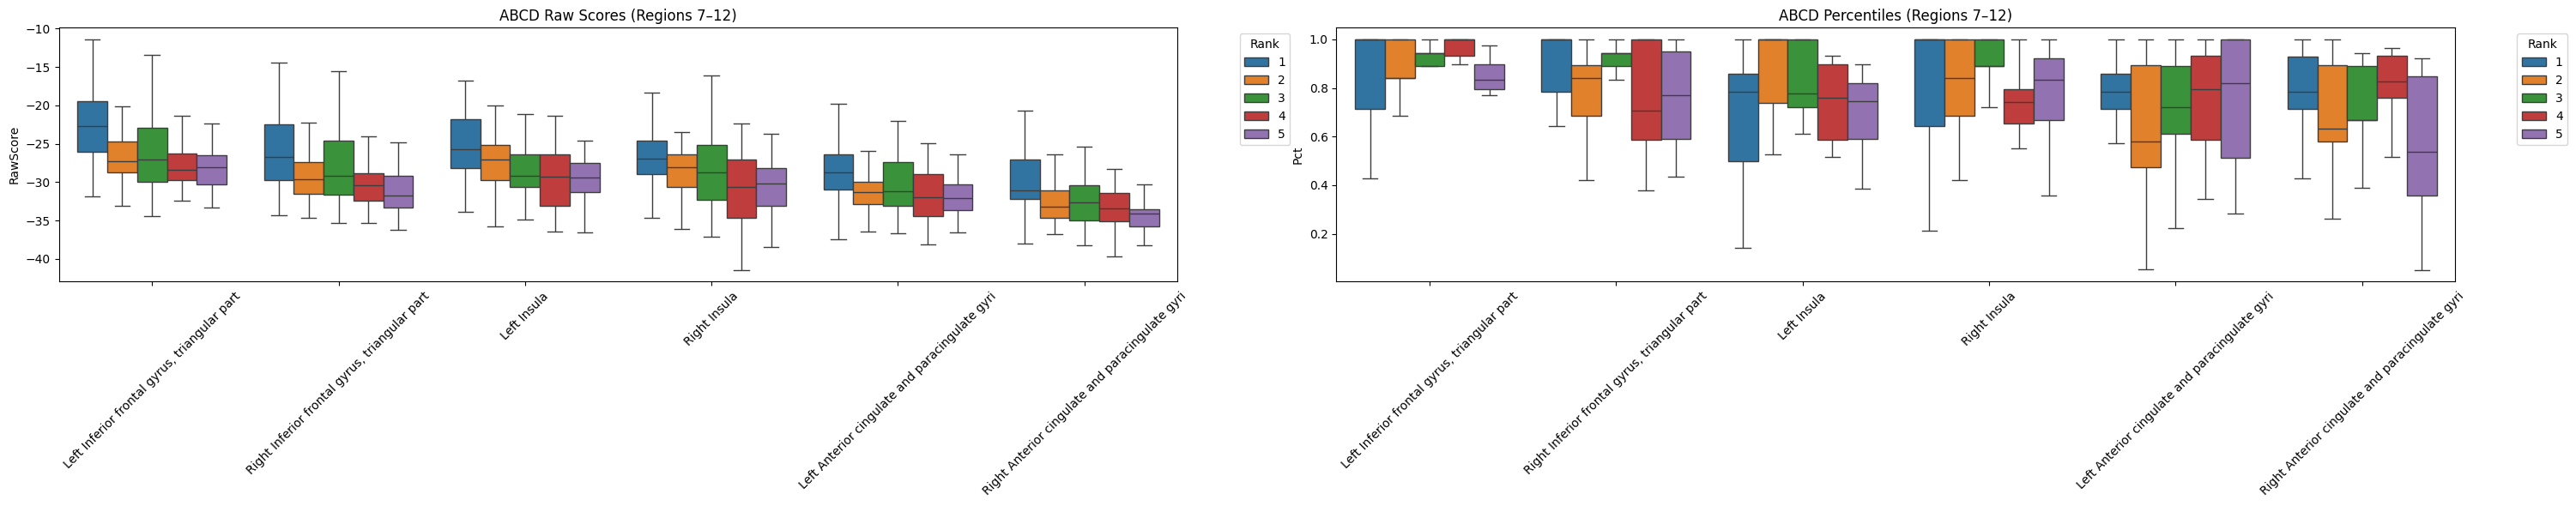

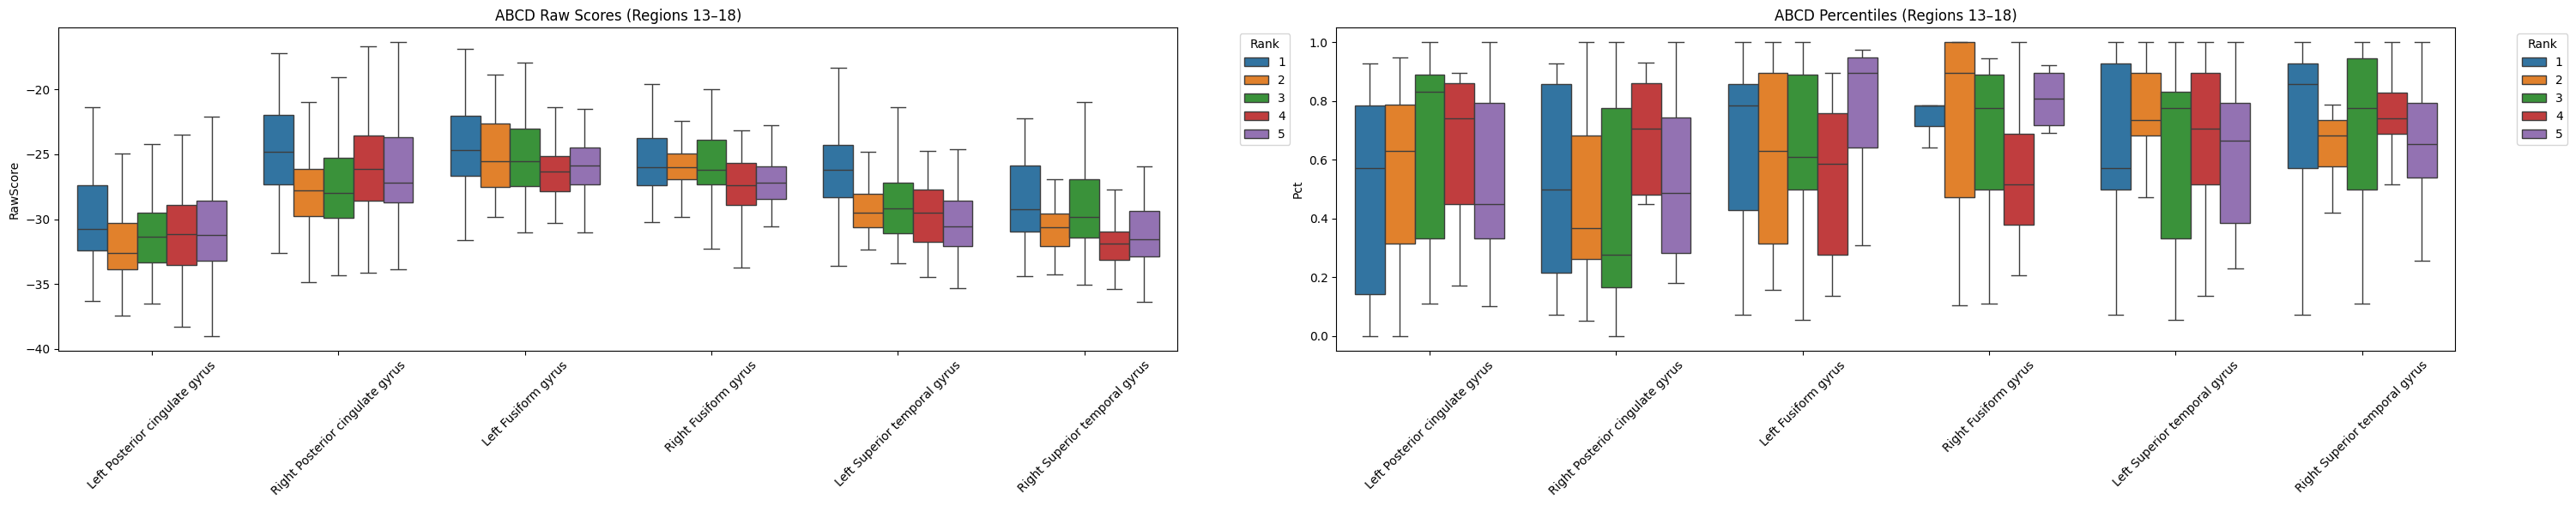

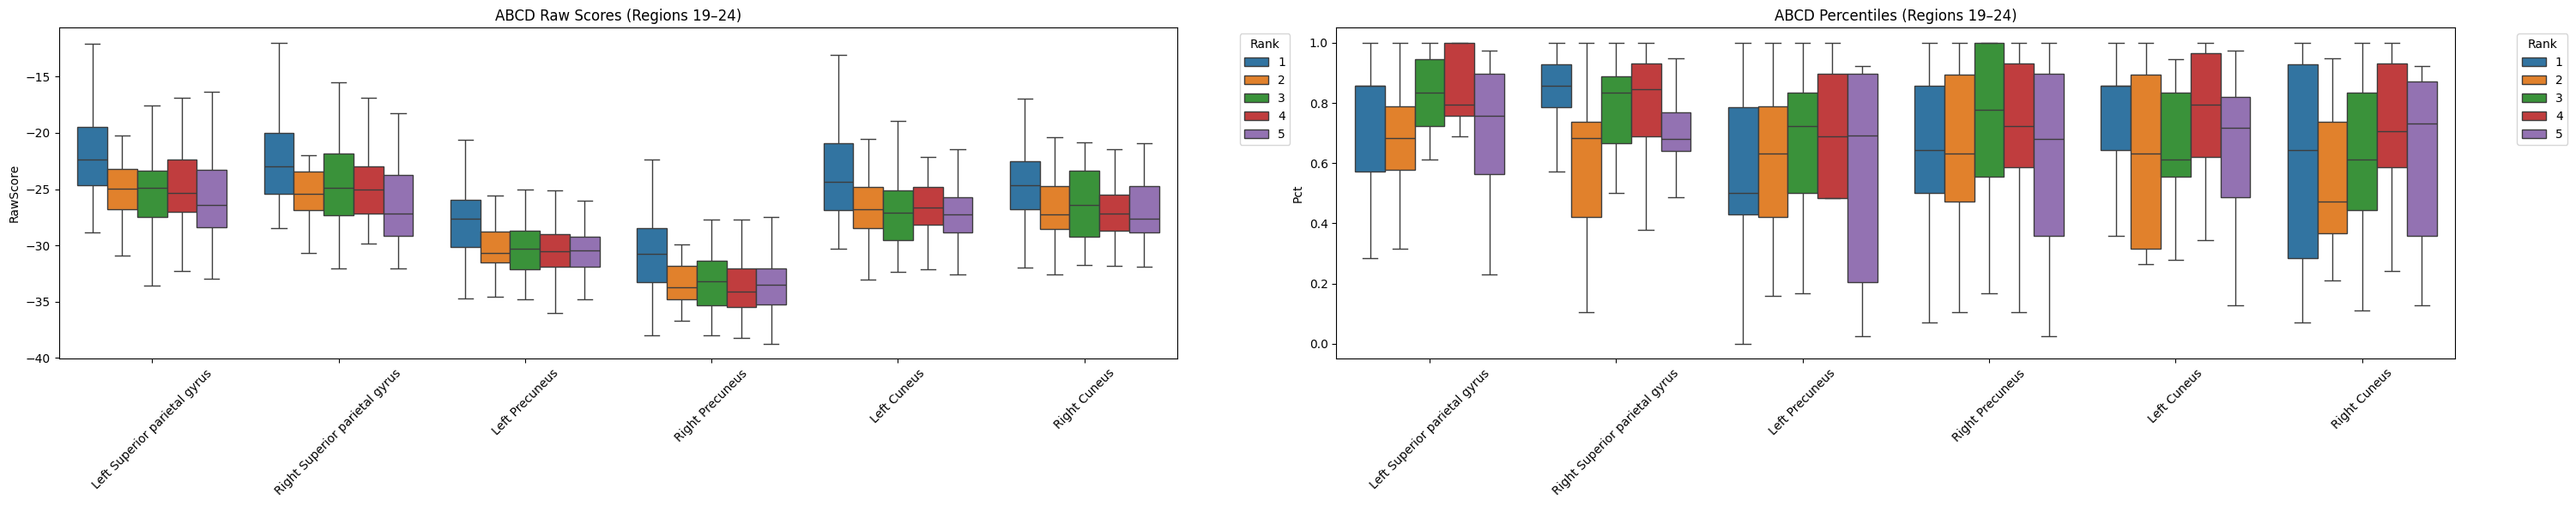

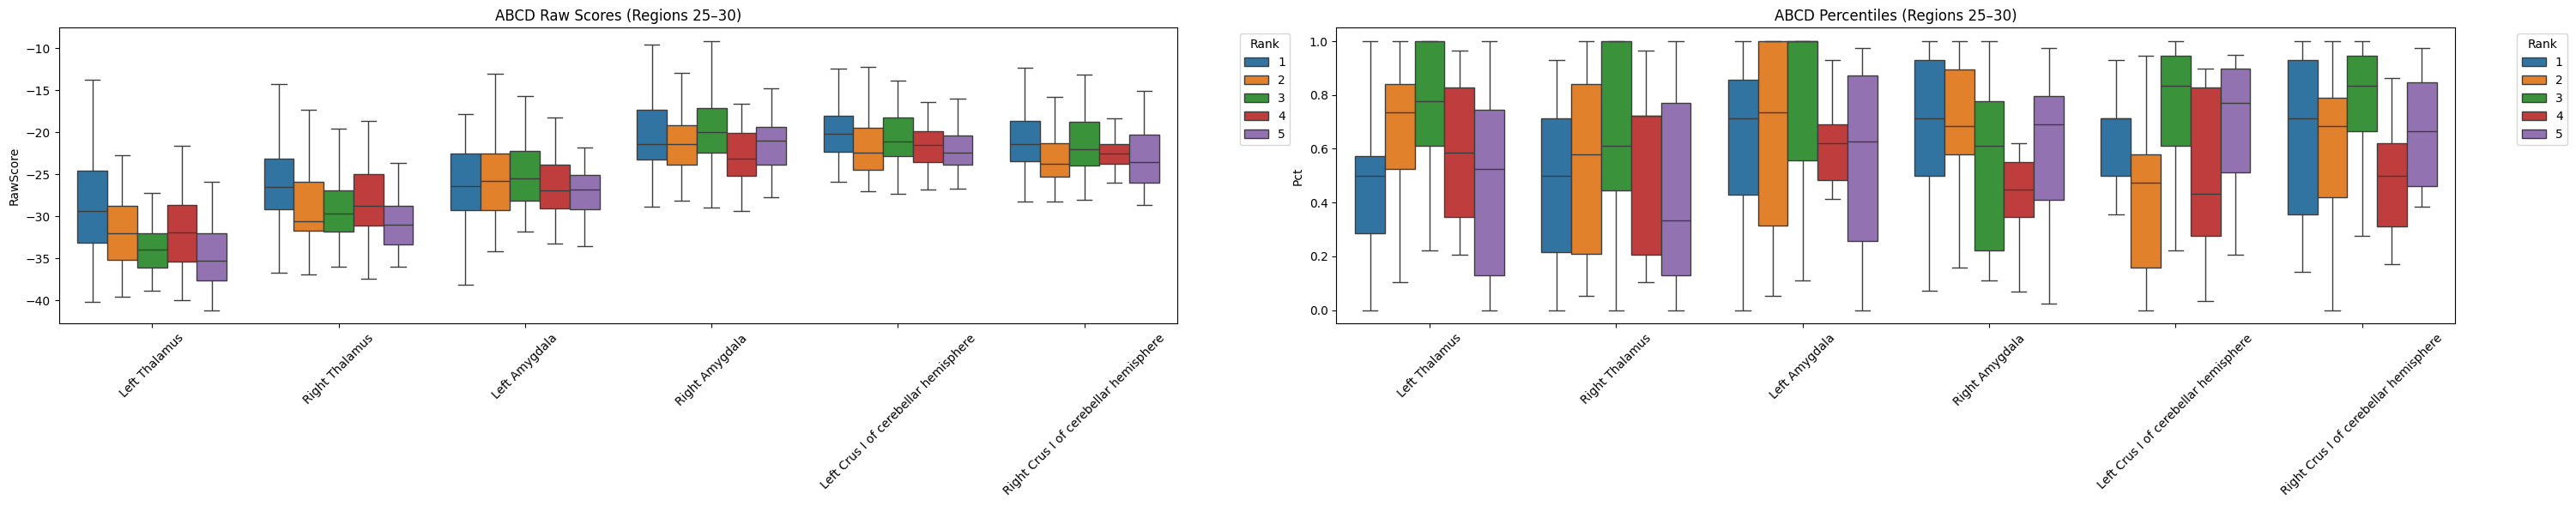

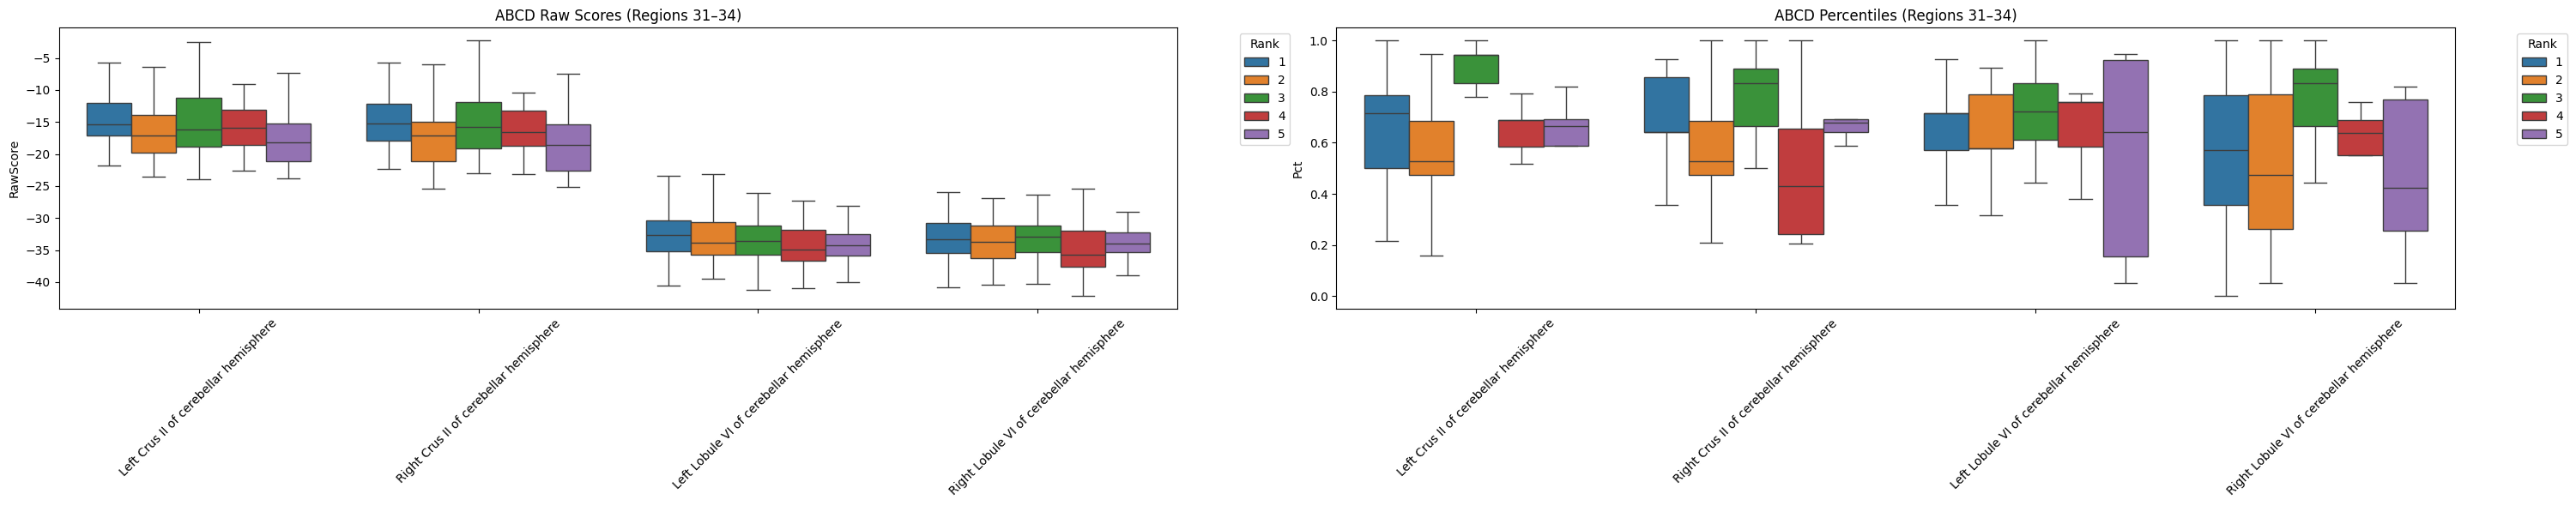

In [30]:
compare_raw_vs_pct_chunked(
    abcd_proto_list,     # raw inlier/outlier list
    abcd_proto_list_pct, # percentile‐augmented list
    region_scores_harmonized,
    "ABCD",
    chunk_size=6,
    figsize=(30,6)
)